In [3]:
import sys
import os
import numpy as np
import pandas as pd
sys.path.append(os.path.abspath('../..'))


# from offshore_wind_nj.data_loader import data_files, load_data, all_arrays, extract_datetime_from_filename, removed_files, load_single_data
# from offshore_wind_nj.sar_wind_plot import plot_wind_field, plot_wind_field_by_arrays
# from offshore_wind_nj.data_cleaning import fill_zeros, find_zeros
# import offshore_wind_nj.data_processing as data_processing
from offshore_wind_nj.config import INTERIM_DATA_DIR
import matplotlib.pyplot as plt
import pickle


# Load the df_scaled

In [2]:
df_scaled_path = os.path.join(INTERIM_DATA_DIR, "df_scaled.pkl")

import pickle

# Open the .pkl file in binary read mode
with open(df_scaled_path, 'rb') as file:
    df_scaled = pickle.load(file)

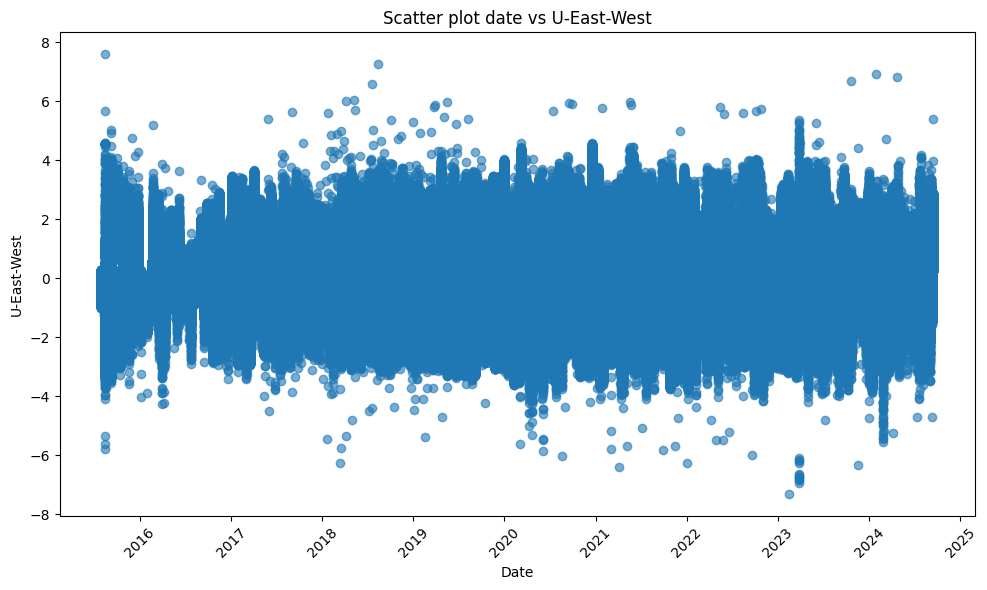

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(df_scaled.index, df_scaled['U-East-West'], alpha = 0.6)

plt.xlabel('Date')
plt.ylabel('U-East-West')
plt.title('Scatter plot date vs U-East-West')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [24]:
df_resampled = df.resample('M').agg({
    'U-East-West': ['mean', 'std', 'median'],
    'V-North-South': ['mean', 'std', 'median']
})


/tmp/ipykernel_29621/1858371644.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df.resample('M').agg({


In [25]:
df_resampled.describe()

U-East-West                         V-North-South              \
             mean         std      median          mean         std   
count  111.000000  111.000000  111.000000    111.000000  111.000000   
mean    -1.677697    4.938774   -1.860057      0.118994    5.354022   
std      2.041175    1.472383    2.349321      2.095974    1.484179   
min     -7.325614    0.923043   -8.082598     -4.290386    0.756721   
25%     -3.007278    3.897354   -3.328363     -1.226286    4.247858   
50%     -1.740822    4.802754   -1.972763     -0.076733    5.209343   
75%     -0.707469    5.931341   -1.114409      1.502375    6.239395   
max      3.099478    8.299614    4.751316      6.541314    8.776519   

                   
           median  
count  111.000000  
mean     0.032068  
std      2.571261  
min     -5.268967  
25%     -1.912388  
50%     -0.276552  
75%      1.942244  
max      6.322306

/home/noriegac/.conda/envs/cris_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


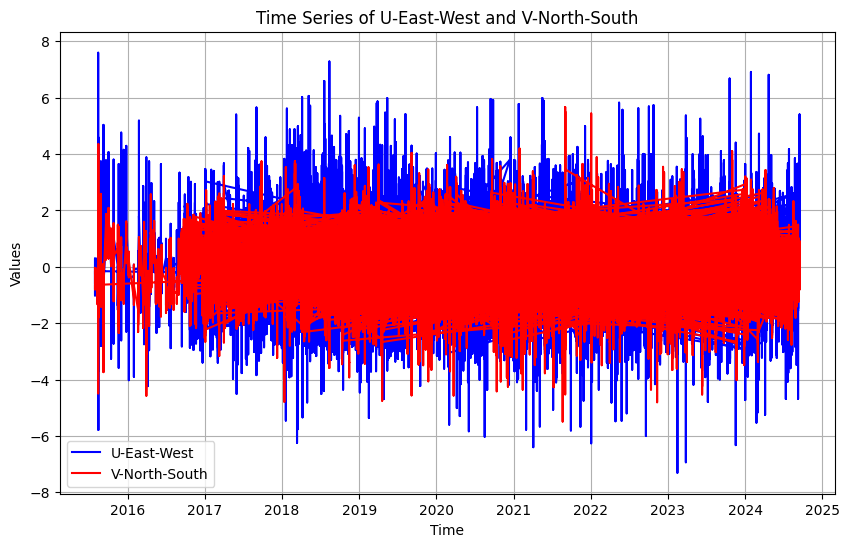

In [27]:
plt.figure(figsize=(10, 6))

# Plot multiple columns
plt.plot(df_scaled.index, df_scaled['U-East-West'], label='U-East-West', color='blue')
plt.plot(df_scaled.index, df_scaled['V-North-South'], label='V-North-South', color='red')

# Labels and title
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time Series of U-East-West and V-North-South')

# Show legend
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


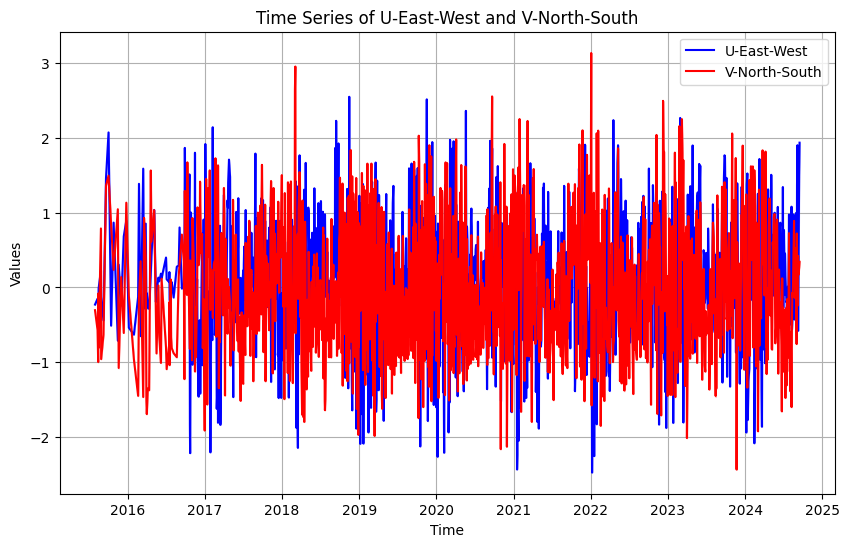

In [29]:
import seaborn as sns

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_scaled, x=df_scaled.index, y='U-East-West', label='U-East-West', color='blue')

# If you have multiple columns, you can loop over them:
sns.lineplot(data=df_scaled, x=df_scaled.index, y='V-North-South', label='V-North-South', color='red')

# Labels and title
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time Series of U-East-West and V-North-South')

# Show the legend
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


In [28]:
df

Speed   Direction  Cos(dir)  Sen(dir)        Lat        Lon  \
Date                                                                          
2019-04-20   9.112082  191.507050 -0.979900 -0.199488  35.735710 -74.001427   
2019-04-20   8.611857  191.513458 -0.979878 -0.199598  35.737404 -73.990570   
2019-04-20   8.684312  191.519867 -0.979855 -0.199708  35.739094 -73.979713   
2019-04-20   8.623184  191.526260 -0.979833 -0.199817  35.740788 -73.968857   
2019-04-20   8.722241  191.532669 -0.979811 -0.199927  35.742477 -73.957993   
...               ...         ...       ...       ...        ...        ...   
2021-01-29  16.900000  321.281860  0.780232 -0.625490  38.554832 -70.874741   
2021-01-29  16.299999  324.274872  0.811827 -0.583897  38.556259 -70.886063   
2021-01-29  16.100000  323.267883  0.801440 -0.598074  38.557686 -70.897392   
2021-01-29  16.400000  322.260895  0.790806 -0.612067  38.559109 -70.908722   
2021-01-29  17.700001  320.253906  0.768885 -0.639387  38.560532 -70.920052   

                                                           ID Start Time  \
Date                                                                       
2019-04-20  S1A_IW_OCN__2SDH_20190420T224949_20190420T2250...   22:49:49   
2019-04-20  S1A_IW_OCN__2SDH_20190420T224949_20190420T2250...   22:49:49   
2019-04-20  S1A_IW_OCN__2SDH_20190420T224949_20190420T2250...   22:49:49   
2019-04-20  S1A_IW_OCN__2SDH_20190420T224949_20190420T2250...   22:49:49   
2019-04-20  S1A_IW_OCN__2SDH_20190420T224949_20190420T2250...   22:49:49   
...                                                       ...        ...   
2021-01-29  S1B_IW_OCN__2SDV_20210129T104109_20210129T1041...   10:41:09   
2021-01-29  S1B_IW_OCN__2SDV_20210129T104109_20210129T1041...   10:41:09   
2021-01-29  S1B_IW_OCN__2SDV_20210129T104109_20210129T1041...   10:41:09   
2021-01-29  S1B_IW_OCN__2SDV_20210129T104109_20210129T1041...   10:41:09   
2021-01-29  S1B_IW_OCN__2SDV_20210129T104109_20210129T1041...   10:41:09   

            End Time  U-East-West  V-North-South              x  \
Date                                                              
2019-04-20  22:50:14    -1.817755      -8.928930 -237611.571366   
2019-04-20  22:50:14    -1.718909      -8.438569 -236625.873432   
2019-04-20  22:50:14    -1.734324      -8.509371 -235640.228878   
2019-04-20  22:50:14    -1.723060      -8.449283 -234654.613501   
2019-04-20  22:50:14    -1.743809      -8.546147 -233668.362582   
...              ...          ...            ...            ...   
2021-01-29  10:41:34   -10.570777      13.185926   43102.933383   
2021-01-29  10:41:34    -9.517527      13.232787   42118.083871   
2021-01-29  10:41:34    -9.629000      12.903192   41132.609846   
2021-01-29  10:41:34   -10.037897      12.969217   40147.176541   
2021-01-29  10:41:34   -11.317142      13.609273   39161.781729   

                        y  Speed_rolling  Cluster  
Date                                               
2019-04-20 -341831.927671       9.112082        2  
2019-04-20 -341672.564783       8.861969        2  
2019-04-20 -341513.506687       8.802750        2  
2019-04-20 -341353.908445       8.757859        2  
2019-04-20 -341194.634552       8.750735        2  
...                   ...            ...      ...  
2021-01-29  -33015.646602      16.340000        0  
2021-01-29  -32863.024808      16.490000        0  
2021-01-29  -32710.284125      16.640000        0  
2021-01-29  -32557.843176      16.810000        0  
2021-01-29  -32405.279749      17.030000        0  

[223109366 rows x 15 columns]

/tmp/ipykernel_29621/672336858.py:27: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/noriegac/.conda/envs/cris_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


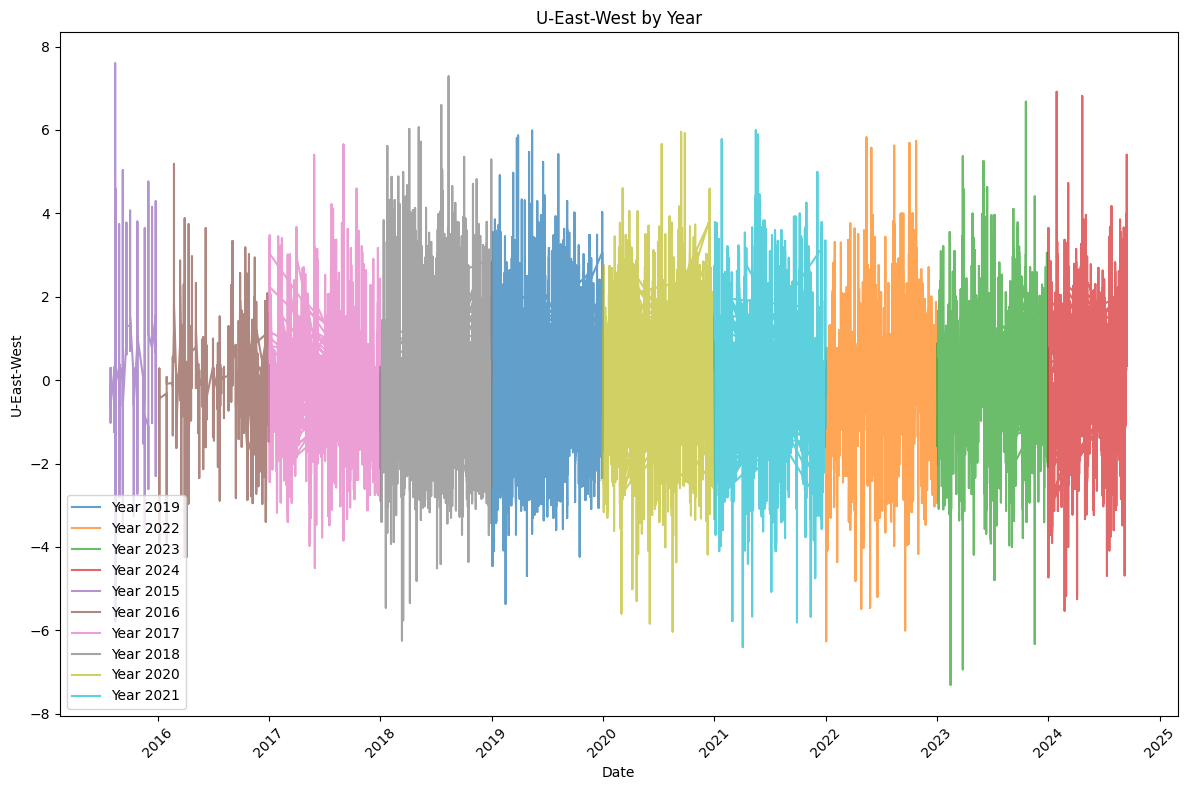

In [12]:
# Extract the year from the index (assuming the index is a datetime object)
df_scaled['Year'] = df_scaled.index.year

# Create a plot
plt.figure(figsize=(12, 8))

# Loop through each year and plot the data for that year
for year in df_scaled['Year'].unique():
    # Filter the data for that year
    df_year = df_scaled[df_scaled['Year'] == year]
    
    # Plot the 'U-East-West' data for that year
    plt.plot(df_year.index, df_year['U-East-West'], label=f'Year {year}', alpha=0.7)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('U-East-West')
plt.title('U-East-West by Year')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show legend
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


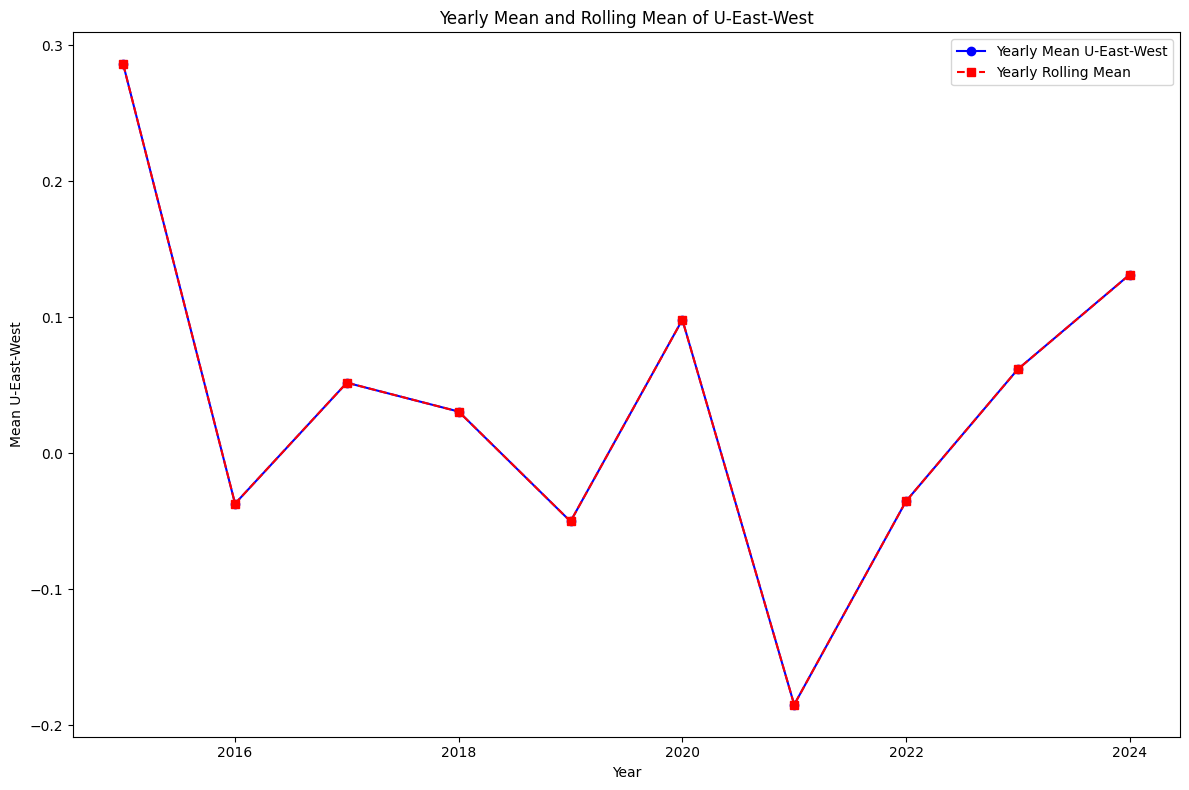

In [13]:
# Calculate the rolling mean and standard deviation (for the entire period, not per year)
df_scaled['Rolling_U_East_West'] = df_scaled['U-East-West'].rolling(window=30).mean()

# Extract the year from the index (assuming the index is a datetime object)
df_scaled['Year'] = df_scaled.index.year

# Calculate the yearly mean of the 'U-East-West' and rolling mean
df_yearly = df_scaled.groupby('Year').agg({
    'U-East-West': 'mean',
    'Rolling_U_East_West': 'mean'
}).reset_index()

# Plot the yearly data
plt.figure(figsize=(12, 8))

# Plot the yearly mean for 'U-East-West'
plt.plot(df_yearly['Year'], df_yearly['U-East-West'], label='Yearly Mean U-East-West', marker='o', linestyle='-', color='blue')

# Plot the yearly rolling mean (calculated over the entire period)
plt.plot(df_yearly['Year'], df_yearly['Rolling_U_East_West'], label='Yearly Rolling Mean', marker='s', linestyle='--', color='red')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Mean U-East-West')
plt.title('Yearly Mean and Rolling Mean of U-East-West')

# Show legend
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


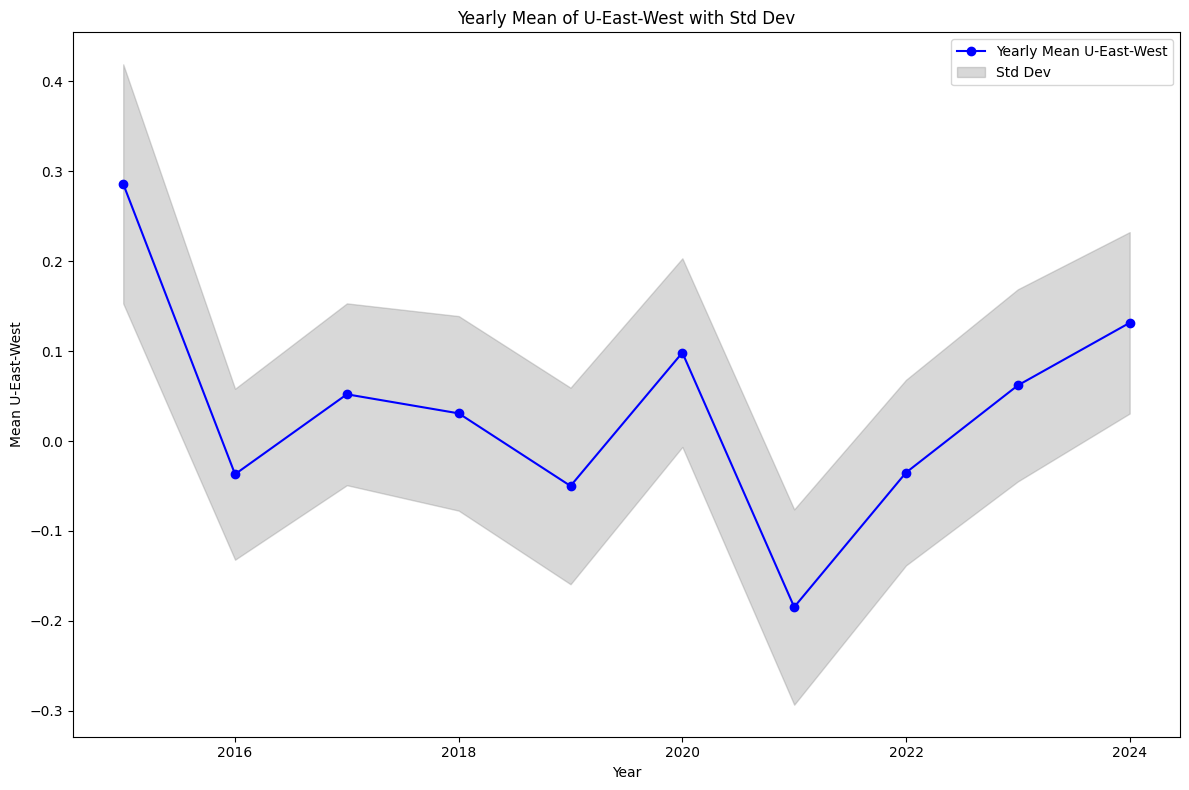

In [14]:
# Calculate the rolling standard deviation
df_scaled['Rolling_Std'] = df_scaled['U-East-West'].rolling(window=30).std()

# Group by year and calculate the yearly mean and rolling standard deviation
df_yearly_stats = df_scaled.groupby('Year').agg({
    'U-East-West': 'mean',
    'Rolling_Std': 'mean'
}).reset_index()

# Plot the data with shaded standard deviation
plt.figure(figsize=(12, 8))

# Plot the yearly mean for 'U-East-West'
plt.plot(df_yearly_stats['Year'], df_yearly_stats['U-East-West'], label='Yearly Mean U-East-West', marker='o', linestyle='-', color='blue')

# Add shaded region for standard deviation (optional)
plt.fill_between(df_yearly_stats['Year'], 
                 df_yearly_stats['U-East-West'] - df_yearly_stats['Rolling_Std'],
                 df_yearly_stats['U-East-West'] + df_yearly_stats['Rolling_Std'],
                 color='gray', alpha=0.3, label='Std Dev')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Mean U-East-West')
plt.title('Yearly Mean of U-East-West with Std Dev')

# Show legend
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


/tmp/ipykernel_29621/3045766869.py:29: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/noriegac/.conda/envs/cris_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


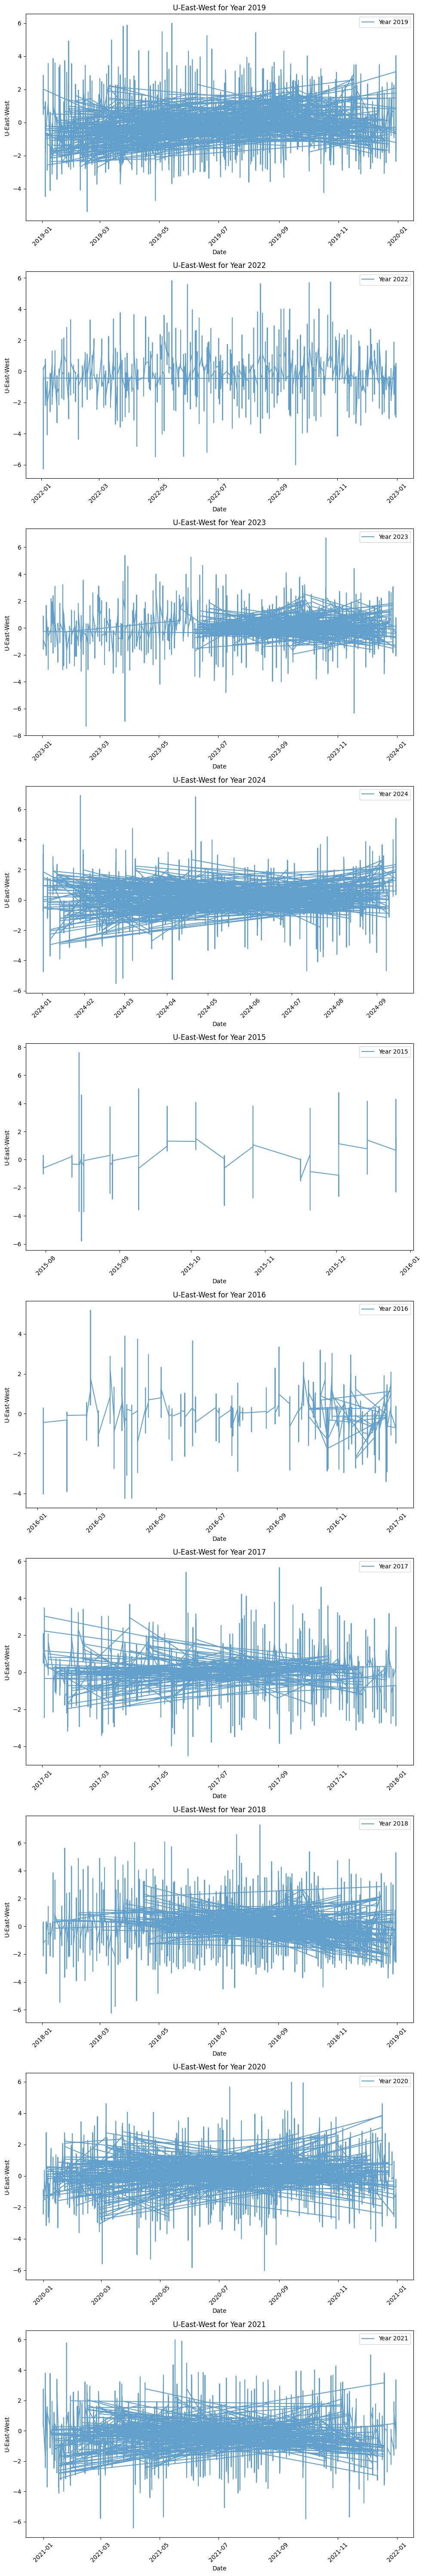

In [15]:
import matplotlib.pyplot as plt

# Extract year from index (assuming index is a datetime object)
df_scaled['Year'] = df_scaled.index.year

# Get the unique years
unique_years = df_scaled['Year'].unique()

# Create subplots for each year
fig, axes = plt.subplots(len(unique_years), 1, figsize=(10, 6*len(unique_years)))

# If there's only one subplot, axes is not a list, so make it iterable
if len(unique_years) == 1:
    axes = [axes]

# Loop through each year and plot its data in the corresponding subplot
for i, year in enumerate(unique_years):
    ax = axes[i]
    df_year = df_scaled[df_scaled['Year'] == year]
    
    ax.plot(df_year.index, df_year['U-East-West'], label=f'Year {year}', alpha=0.7)
    ax.set_title(f'U-East-West for Year {year}')
    ax.set_xlabel('Date')
    ax.set_ylabel('U-East-West')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# Scale the data 
## if there are any error indices, then remove them from the filename_datetimes list

# Calculate U (east-west) and V (north-south) components

## Normalize the U and V components using StandardScaler

## Define a function to calculate haversine distance between two points

In [4]:
df_path = os.path.join(INTERIM_DATA_DIR,"df.pkl")
with open(df_path, 'rb') as file:
    df = pickle.load(file)

In [5]:
df = df.reset_index()

In [7]:
cluster_dfs = {}  # Create an empty dictionary to store DataFrames

for cluster in df['Cluster'].unique():
    cluster_dfs[cluster] = df[df['Cluster'] == cluster]


In [8]:
df_cluster_0 = cluster_dfs[0]
df_cluster_1 = cluster_dfs[1]
df_cluster_2 = cluster_dfs[2]
df_cluster_3 = cluster_dfs[3]
df_cluster_4 = cluster_dfs[4]



In [29]:
df_cluster_0['Lat'].max()

43.18608093261719

In [30]:
df_cluster_0['Lat'].min()

34.614688873291016

In [31]:
df_cluster_0['Lon'].min()

-76.45196533203125

In [32]:
df_cluster_0['Lon'].max()

-64.24435424804688

# Cluster 0

In [15]:
df_cluster_0_dates = df_cluster_0.pivot_table(['Speed', 'U-East-West', 'V-North-South'], index = 'Date', aggfunc=['mean','median','std'])

In [23]:

pd.set_option('display.max_rows',30)
df_cluster_0_dates.columns = ['_'.join(col).strip() for col in df_cluster_0_dates.columns.values]

In [35]:
df_cluster_0_dates = df_cluster_0_dates.reset_index()

In [50]:
df_cluster_0_dates['Month-Day'] = df_cluster_0_dates['Date'].dt.strftime('%m-%d')  # For x-axis labels
df_cluster_0_dates['Year'] = df_cluster_0_dates['Date'].dt.year  # Extract year for different lines

In [68]:
df_cluster_0_dates_ = df_cluster_0_dates[df_cluster_0_dates['Year']==2019]
df_cluster_0_dates_

Date  mean_Speed  mean_U-East-West  mean_V-North-South  \
237 2019-01-04    6.237688         -4.434908            3.871087   
238 2019-01-06   14.564853        -13.367004            5.168474   
239 2019-01-09   13.667092        -12.302912            5.128946   
240 2019-01-11   11.610815        -10.173714            5.183918   
241 2019-01-14   10.449695         -3.576564            9.616319   
..         ...         ...               ...                 ...   
344 2019-12-20   13.054144        -10.701550            7.442347   
345 2019-12-23    8.823630         -8.762355           -0.536657   
346 2019-12-25    6.108388         -2.841866            5.365250   
347 2019-12-28    6.489008         -3.168605            5.570357   
348 2019-12-30   10.755237        -10.645730            0.603769   

     median_Speed  median_U-East-West  median_V-North-South  std_Speed  \
237      6.215324           -4.251503              4.090694   0.874051   
238     14.643648          -13.226870              5.438207   1.277308   
239     13.716280          -12.497444              5.516307   1.211426   
240     11.494974          -10.186945              5.247582   1.505509   
241     11.756915           -3.738116             10.665976   2.407322   
..            ...                 ...                   ...        ...   
344     13.200000          -10.791002              7.499698   1.355244   
345      9.400000           -9.368595             -0.684829   1.830035   
346      6.200000           -2.929749              5.385576   0.550515   
347      6.400000           -2.973238              5.546569   0.522718   
348     11.100000          -10.894726              0.359734   2.332541   

     std_U-East-West  std_V-North-South Month-Day  Year  
237         1.761933           1.383695     01-04  2019  
238         1.793335           2.271701     01-06  2019  
239         1.843714           2.681419     01-09  2019  
240         2.039734           1.593617     01-11  2019  
241         1.675836           2.630163     01-14  2019  
..               ...                ...       ...   ...  
344         1.450061           0.482680     12-20  2019  
345         1.863042           0.817143     12-23  2019  
346         0.775203           0.390436     12-25  2019  
347         0.926576           0.673059     12-28  2019  
348         2.276992           1.495273     12-30  2019  

[112 rows x 12 columns]

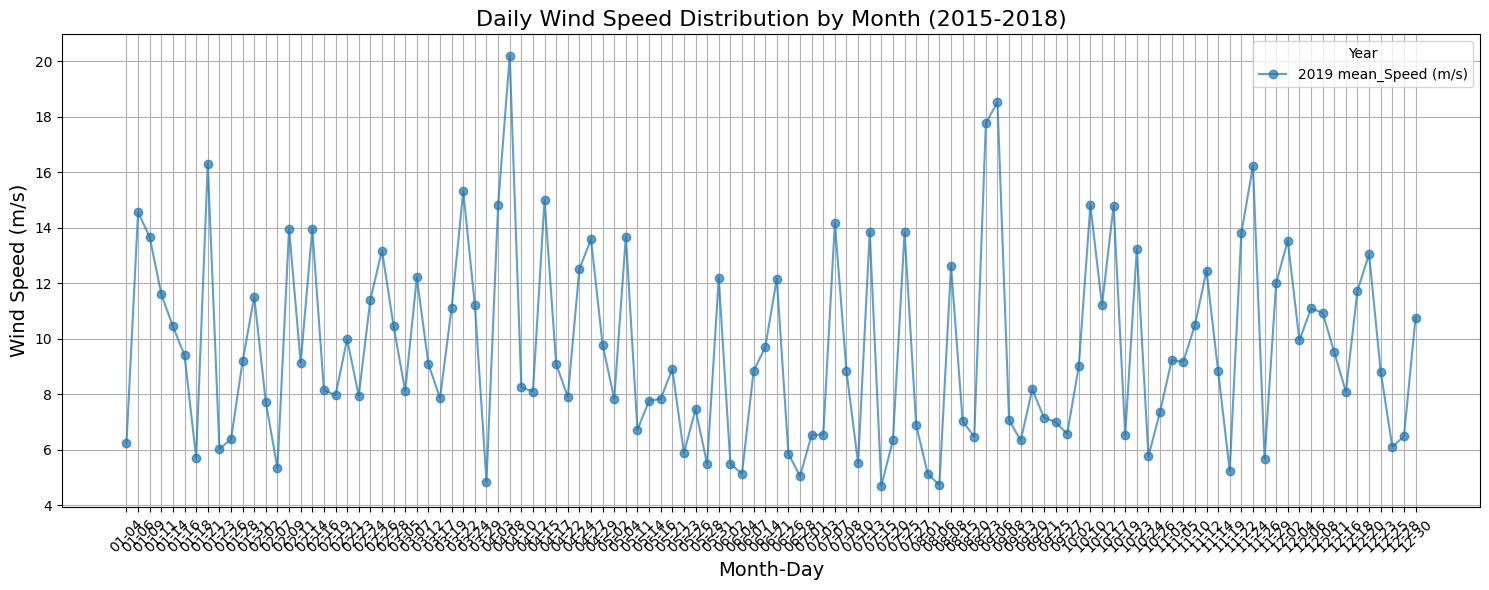

In [69]:
# Plotting each year's wind speed data overlaid
plt.figure(figsize=(15, 6))

# Plot data for each year
for year in df_cluster_0_dates_['Year'].unique():
    # Filter data for this year
    yearly_data = df_cluster_0_dates_[df_cluster_0_dates_['Year'] == year]
    
    # Plot wind speed data for this year
    plt.plot(yearly_data['Month-Day'], yearly_data['mean_Speed'], 
             marker='o', label=f'{year} mean_Speed (m/s)', alpha=0.7)

# Adding title and axis labels
plt.title("Daily Wind Speed Distribution by Month (2015-2018)", fontsize=16)
plt.xlabel("Month-Day", fontsize=14)
plt.ylabel("Wind Speed (m/s)", fontsize=14)

# Rotate x-axis labels for readability (Month-Day format)
plt.xticks(rotation=45)

# Display grid and legend
plt.grid(True)
plt.legend(title="Year")

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

In [71]:
df_cluster_0['Speed'].values

128160       17.600000
128316       12.400000
132257        8.400000
132663        8.600000
132664        8.800000
               ...    
223109361    16.900000
223109362    16.299999
223109363    16.100000
223109364    16.400000
223109365    17.700001
Name: Speed, Length: 41702334, dtype: float32

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, zscore

def analyze_wind_speeds(wind_speeds, title ='Histogram of Wind Speeds'):
    """
    Analyzes wind speeds, including calculating mean, median, skewness, 
    and identifying outliers using z-scores. Also plots a histogram of the wind speeds.
    
    Parameters:
    wind_speeds (numpy.ndarray): A NumPy array of wind speed values (can contain NaNs).
    
    Returns:
    None
    """
    # Calculate statistics
    mean_speed = np.nanmean(wind_speeds)
    median_speed = np.nanmedian(wind_speeds)
    skewness = skew(wind_speeds, nan_policy='omit')  # Skew ignores NaNs
    
    # Z-score for identifying outliers, ignoring NaNs
    z_scores = zscore(wind_speeds, nan_policy='omit')
    outliers = wind_speeds[np.abs(z_scores) > 3]  # Common threshold for outliers
    
    # Display statistics
    print(f"Mean Wind Speed: {mean_speed:.2f}")
    print(f"Median Wind Speed: {median_speed:.2f}")
    print(f"Skewness of Wind Speed Distribution: {skewness:.2f}")
    print(f"Identified Outliers: {outliers}")
    
    # Plotting histogram
    plt.figure(figsize=(10, 6))
    plt.hist(wind_speeds, bins=70, color='blue', alpha=0.7)
    
    # Plotting mean and median lines
    plt.axvline(mean_speed, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_speed:.2f}')
    plt.axvline(median_speed, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_speed:.2f}')
    
    plt.title(f'{title}')
    plt.xlabel('Wind Speed')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Example usage
# analyze_wind_speeds(df_cluster_0['Speed'].values)


Mean Wind Speed: 10.90
Median Wind Speed: 10.80
Skewness of Wind Speed Distribution: 0.24
Identified Outliers: [24.040342 22.231657 21.842834 ... 21.8      21.8      21.7     ]


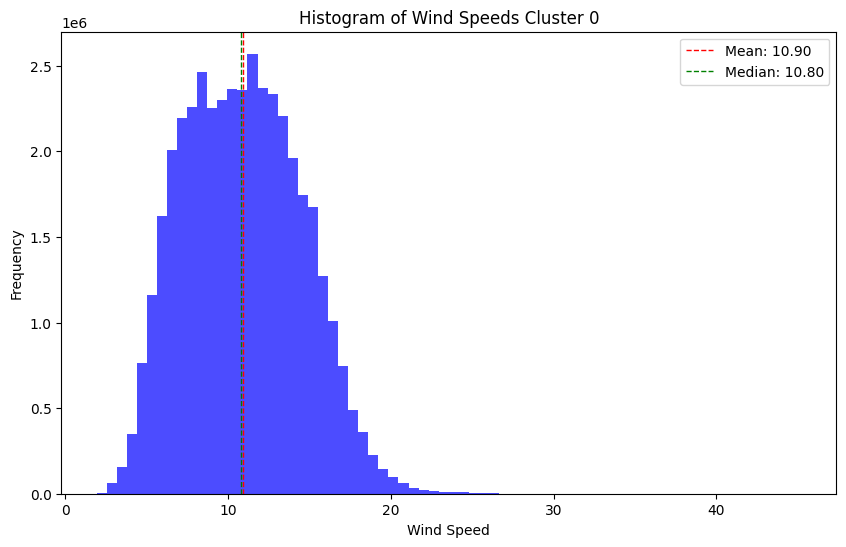

In [74]:
analyze_wind_speeds(df_cluster_0['Speed'].values, 'Histogram of Wind Speeds Cluster 0')

Mean Wind Speed: 7.78
Median Wind Speed: 7.37
Skewness of Wind Speed Distribution: 0.52
Identified Outliers: [21.04554  19.221024 34.180264 ... 19.143875 19.315926 19.085905]


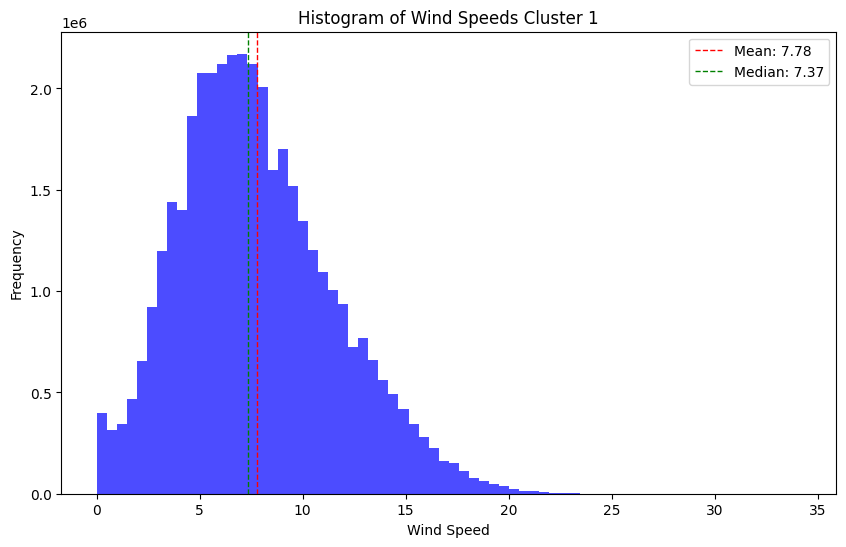

In [75]:
analyze_wind_speeds(df_cluster_1['Speed'].values, 'Histogram of Wind Speeds Cluster 1')

Mean Wind Speed: 5.79
Median Wind Speed: 5.60
Skewness of Wind Speed Distribution: 0.57
Identified Outliers: [14.772604  14.9360485 15.241556  ... 15.1       18.2       15.       ]


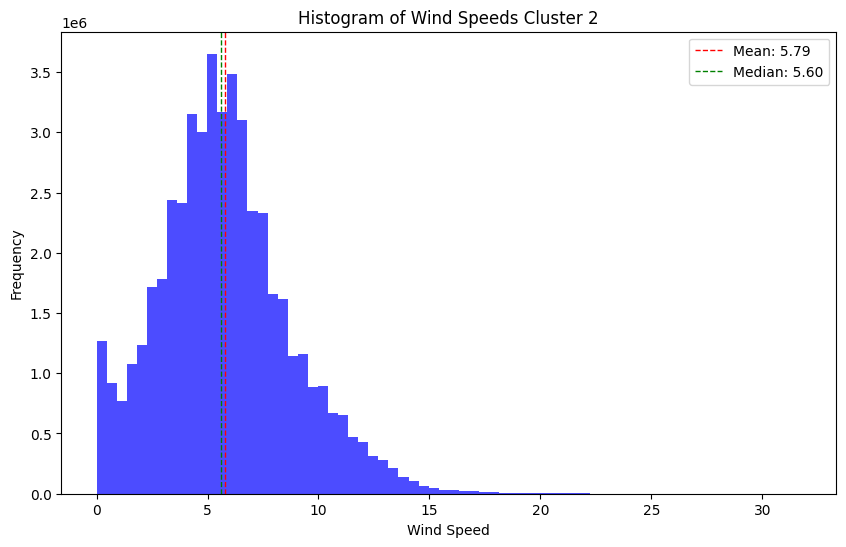

In [76]:
analyze_wind_speeds(df_cluster_2['Speed'].values, 'Histogram of Wind Speeds Cluster 2')

Mean Wind Speed: 5.33
Median Wind Speed: 5.10
Skewness of Wind Speed Distribution: 0.67
Identified Outliers: [21.019539 17.547184 17.44068  ... 16.595694 16.03473  17.20805 ]


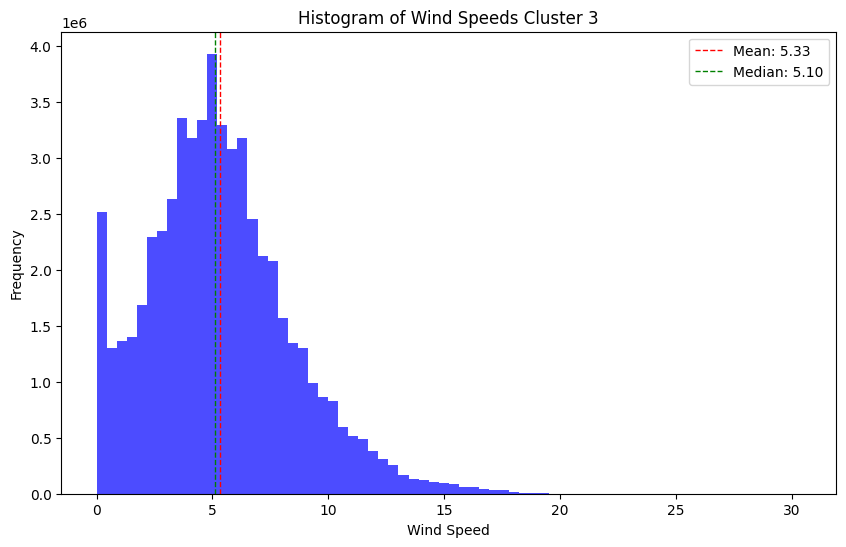

In [77]:
analyze_wind_speeds(df_cluster_3['Speed'].values, 'Histogram of Wind Speeds Cluster 3')

Mean Wind Speed: 8.53
Median Wind Speed: 7.90
Skewness of Wind Speed Distribution: 0.66
Identified Outliers: [19.859734 20.515032 20.230253 ... 19.4      19.4      19.6     ]


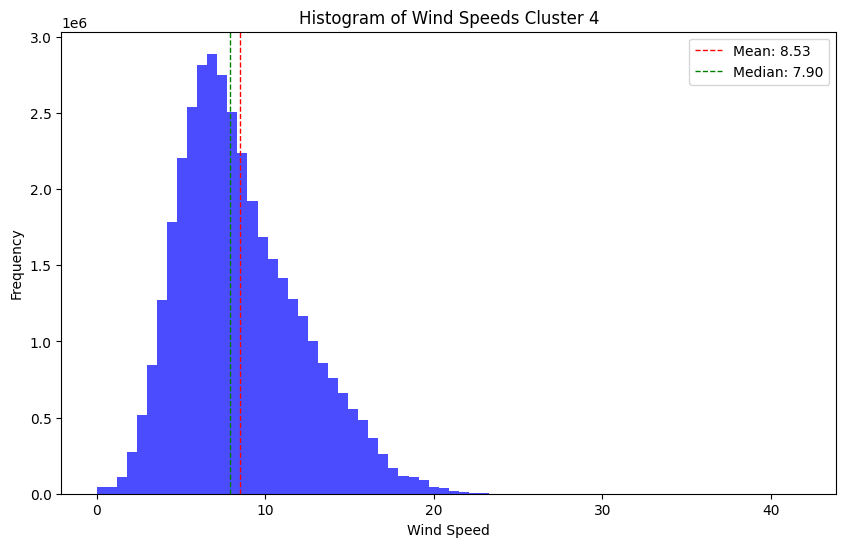

In [78]:
analyze_wind_speeds(df_cluster_4['Speed'].values, 'Histogram of Wind Speeds Cluster 4')

In [80]:
df.pivot_table(['U-East-West', 'V-North-South'], index='Date', columns='Cluster', aggfunc=['mean','median'])

mean                                                         \
           U-East-West                                          V-North-South   
Cluster              0         1         2         3          4             0   
Date                                                                            
2015-07-31         NaN       NaN       NaN -3.119044        NaN           NaN   
2015-08-12         NaN       NaN       NaN -2.674945        NaN           NaN   
2015-08-15  -22.590322       NaN -3.003804 -3.506796  35.737591     -8.222861   
2015-08-16  -11.978906       NaN -5.407552 -3.650015  11.995491      7.501850   
2015-08-17         NaN       NaN       NaN -1.908849        NaN           NaN   
...                ...       ...       ...       ...        ...           ...   
2024-09-06         NaN       NaN  3.788709       NaN        NaN           NaN   
2024-09-08   -5.877994       NaN -4.735536 -7.107828        NaN      3.154348   
2024-09-10   -5.108388 -1.275919       NaN -2.723598   1.680804      1.135075   
2024-09-13         NaN       NaN  6.639859       NaN  11.021449           NaN   
2024-09-15         NaN       NaN  6.024393  4.908499   9.434160           NaN   

                                                         median           \
                                                    U-East-West            
Cluster            1         2         3          4           0        1   
Date                                                                       
2015-07-31       NaN       NaN -1.590213        NaN         NaN      NaN   
2015-08-12       NaN       NaN -3.166777        NaN         NaN      NaN   
2015-08-15       NaN -6.008283 -5.083569  -1.464678  -22.590322      NaN   
2015-08-16       NaN -1.137694 -0.413112  15.039162  -11.802990      NaN   
2015-08-17       NaN       NaN -4.589713        NaN         NaN      NaN   
...              ...       ...       ...        ...         ...      ...   
2024-09-06       NaN  1.425398       NaN        NaN         NaN      NaN   
2024-09-08       NaN  2.726964  1.007098        NaN   -6.011931      NaN   
2024-09-10  0.315829       NaN -0.113991   3.590142   -5.193338 -0.77958   
2024-09-13       NaN  1.789162       NaN   1.407139         NaN      NaN   
2024-09-15       NaN -2.096793 -1.899676   2.590830         NaN      NaN   

                                                                             \
                                          V-North-South                       
Cluster            2         3          4             0         1         2   
Date                                                                          
2015-07-31       NaN -2.950222        NaN           NaN       NaN       NaN   
2015-08-12       NaN -2.638075        NaN           NaN       NaN       NaN   
2015-08-15 -2.615280 -2.994679  35.737591     -8.222861       NaN -5.290206   
2015-08-16 -5.576181 -3.422960   9.871328      5.349981       NaN -1.111048   
2015-08-17       NaN -1.585755        NaN           NaN       NaN       NaN   
...              ...       ...        ...           ...       ...       ...   
2024-09-06  3.739519       NaN        NaN           NaN       NaN  1.688781   
2024-09-08 -4.396969 -7.189471        NaN      3.015399       NaN  2.581164   
2024-09-10       NaN -2.373347   1.691400      0.911521  0.298169       NaN   
2024-09-13  5.841729       NaN  11.030988           NaN       NaN  1.935379   
2024-09-15  6.210683  5.219462   9.645772           NaN       NaN -2.369519   

                                 
                                 
Cluster            3          4  
Date                             
2015-07-31 -1.491159        NaN  
2015-08-12 -2.988057        NaN  
2015-08-15 -4.964885  -1.464678  
2015-08-16 -0.734607  13.967705  
2015-08-17 -4.495782        NaN  
...              ...        ...  
2024-09-06       NaN        NaN  
2024-09-08  0.660620        NaN  
2024-09-10  0.060244   3.603209  
2024-09-13       NaN   1.442106  

In [98]:
df_cluster_0 = df_cluster_0.sort_values(by='Date')

In [99]:
df_cluster_0[df_cluster_0['Date'].dt.year ==2020]



Date  Speed   Direction  Cos(dir)  Sen(dir)        Lat  \
180652002 2020-01-01   10.7  281.446564  0.198454 -0.980110  36.633751   
180652001 2020-01-01   11.2  281.453156  0.198567 -0.980087  36.632141   
180652000 2020-01-01   11.8  281.459747  0.198679 -0.980065  36.630531   
180652016 2020-01-01   13.0  282.354340  0.213957 -0.976843  36.656178   
180651998 2020-01-01   10.9  281.472900  0.198904 -0.980019  36.627304   
...              ...    ...         ...       ...       ...        ...   
82976556  2020-12-31    7.5  303.380035  0.550190 -0.835040  40.047546   
82976555  2020-12-31    7.6  302.372589  0.535423 -0.844584  40.045914   
82976554  2020-12-31    7.5  305.365143  0.578785 -0.815480  40.044277   
82976557  2020-12-31    7.4  306.387512  0.593243 -0.805023  40.049179   
82976553  2020-12-31    7.2  305.357666  0.578679 -0.815555  40.042641   

                 Lon                                                 ID  \
180652002 -65.293762  S1B_IW_OCN__2SDV_20200101T102529_20200101T1026...   
180652001 -65.282761  S1B_IW_OCN__2SDV_20200101T102529_20200101T1026...   
180652000 -65.271759  S1B_IW_OCN__2SDV_20200101T102529_20200101T1026...   
180652016 -65.447823  S1B_IW_OCN__2SDV_20200101T102529_20200101T1026...   
180651998 -65.249763  S1B_IW_OCN__2SDV_20200101T102529_20200101T1026...   
...              ...                                                ...   
82976556  -68.206100  S1A_IW_OCN__2SDV_20201231T222620_20201231T2226...   
82976555  -68.217621  S1A_IW_OCN__2SDV_20201231T222620_20201231T2226...   
82976554  -68.229149  S1A_IW_OCN__2SDV_20201231T222620_20201231T2226...   
82976557  -68.194572  S1A_IW_OCN__2SDV_20201231T222620_20201231T2226...   
82976553  -68.240669  S1A_IW_OCN__2SDV_20201231T222620_20201231T2226...   

          Start Time  End Time  U-East-West  V-North-South              x  \
180652002   10:25:29  10:26:00   -10.487180       2.123455  541922.738632   
180652001   10:25:29  10:26:00   -10.976978       2.223948  542914.260073   
180652000   10:25:29  10:26:00   -11.564761       2.344418  543905.816523   
180652016   10:25:29  10:26:00   -12.698960       2.781440  528042.520992   
180651998   10:25:29  10:26:00   -10.682206       2.168056  545888.411619   
...              ...       ...          ...            ...            ...   
82976556    22:26:20  22:26:45    -6.262797       4.126423  269255.889997   
82976555    22:26:20  22:26:45    -6.418840       4.069212  268282.323390   
82976554    22:26:20  22:26:45    -6.116101       4.340888  267308.072497   
82976557    22:26:20  22:26:45    -5.957172       4.390001  270230.055542   
82976553    22:26:20  22:26:45    -5.871999       4.166488  266334.420502   

                       y  Speed_rolling  Cluster  
180652002 -227736.702037          11.13        0  
180652001 -227849.156526          11.15        0  
180652000 -227961.490168          11.11        0  
180652016 -226162.098690          12.17        0  
180651998 -228186.683447          10.91        0  
...                  ...            ...      ...  
82976556   136782.699135           7.56        0  
82976555   136568.080285           7.57        0  
82976554   136353.139222           7.55        0  
82976557   136997.462867           7.55        0  
82976553   136138.342894           7.54        0  

[5443028 rows x 16 columns]

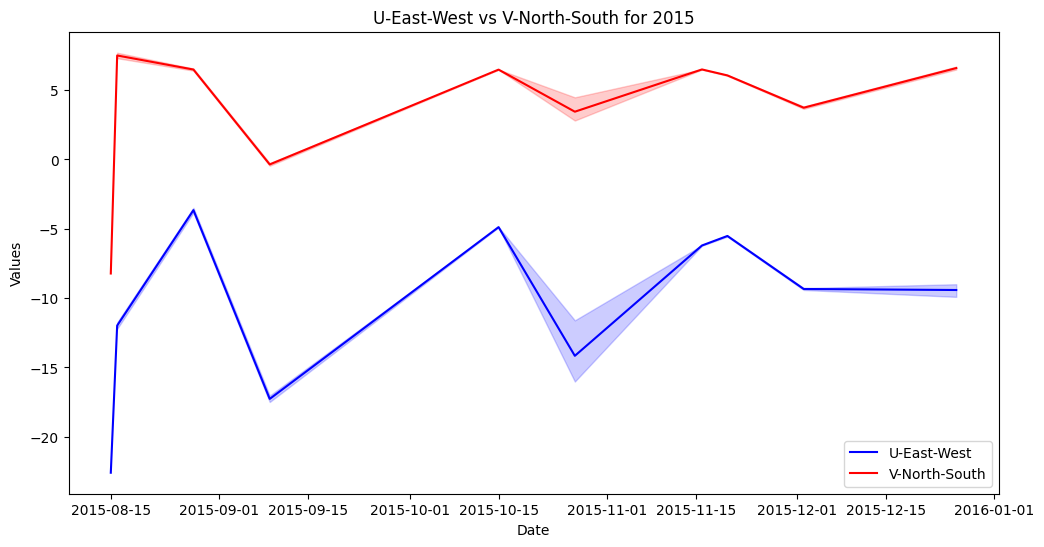

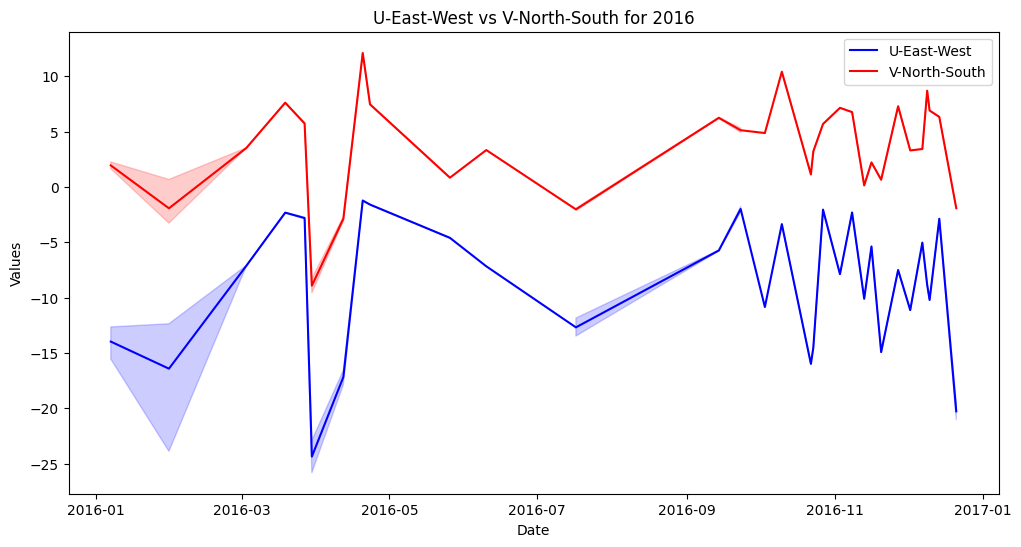

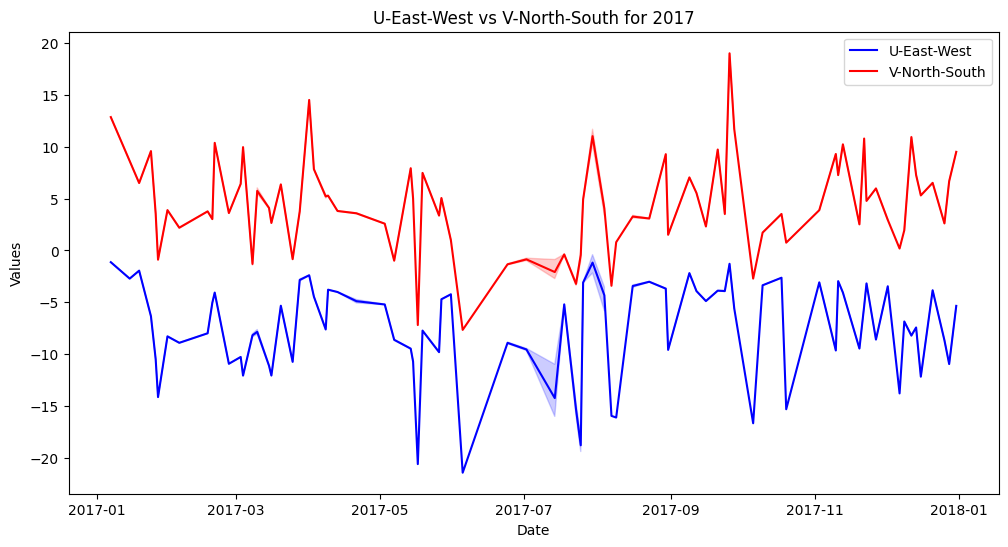

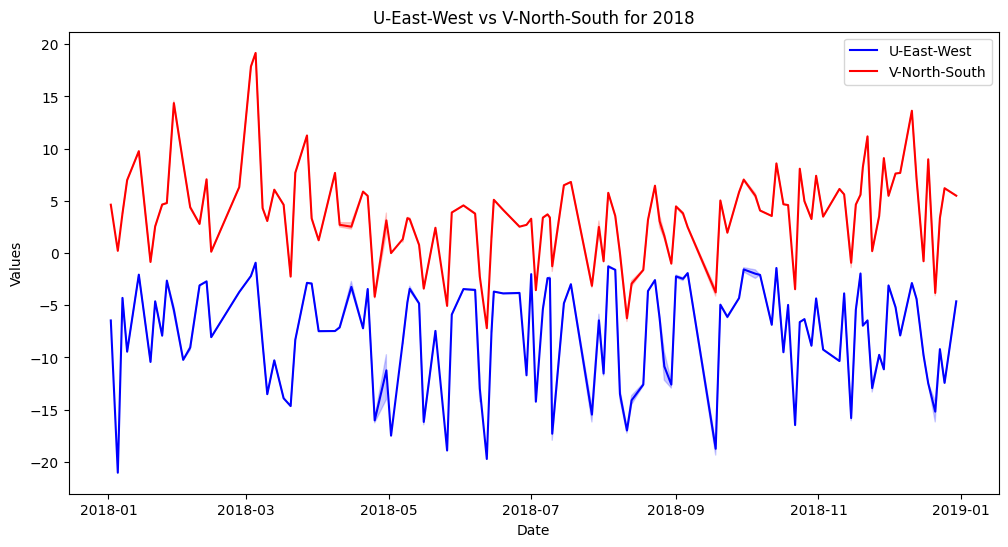

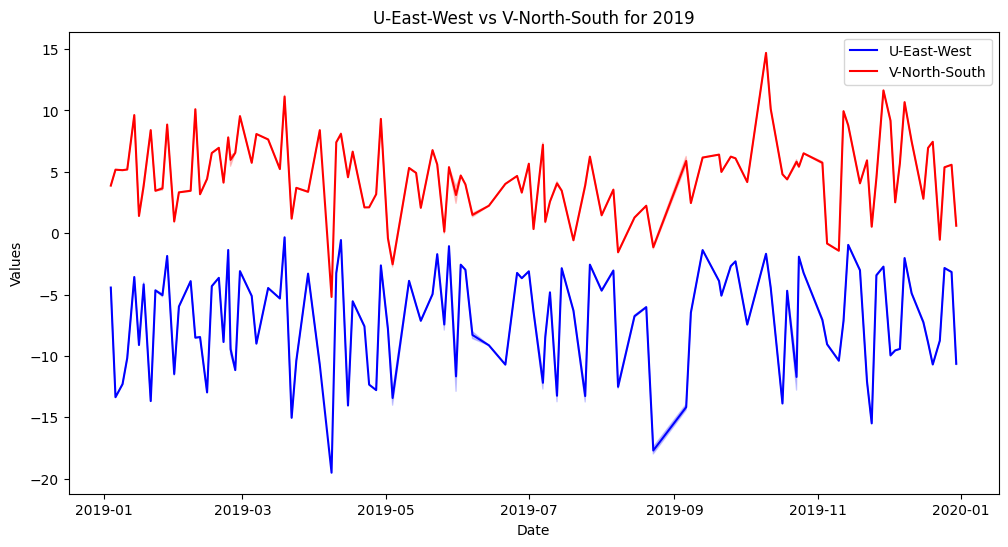

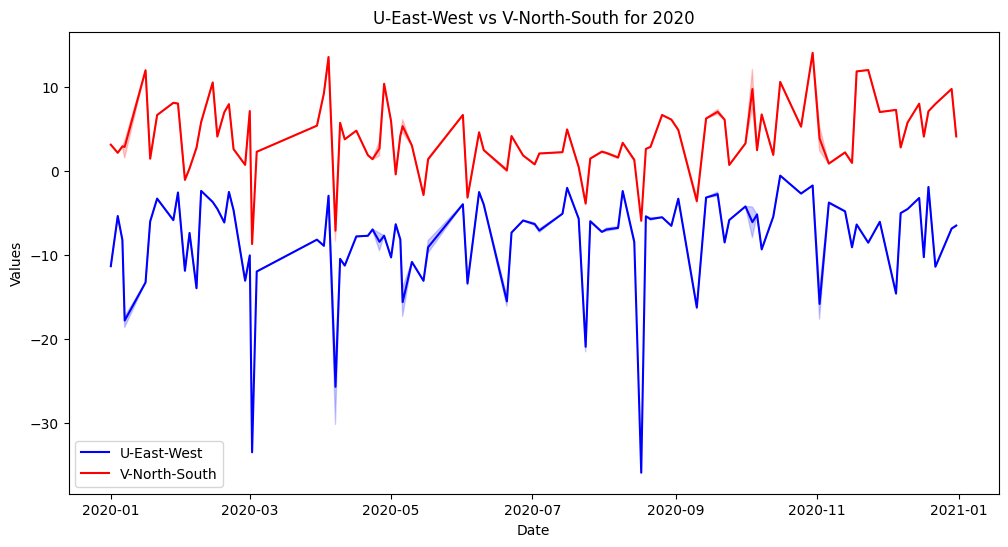

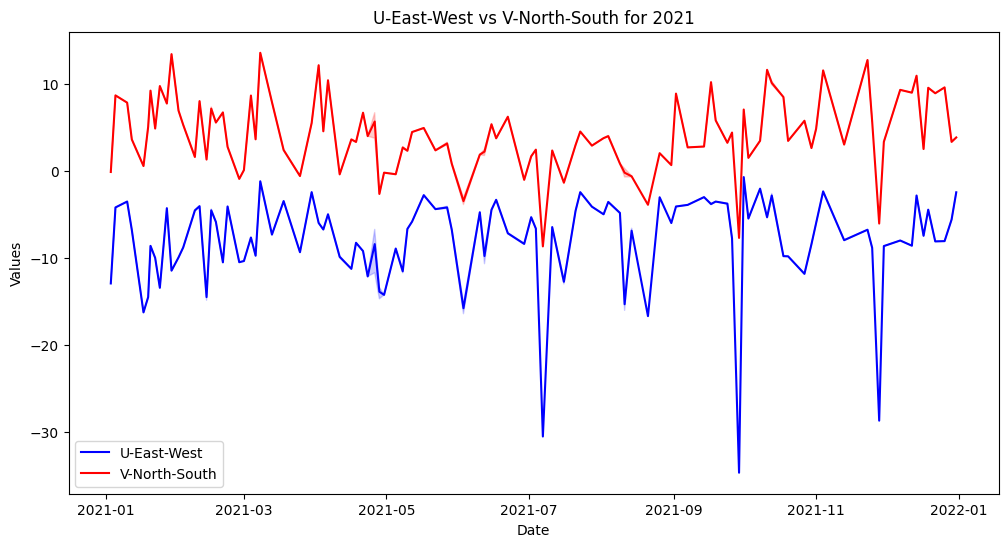

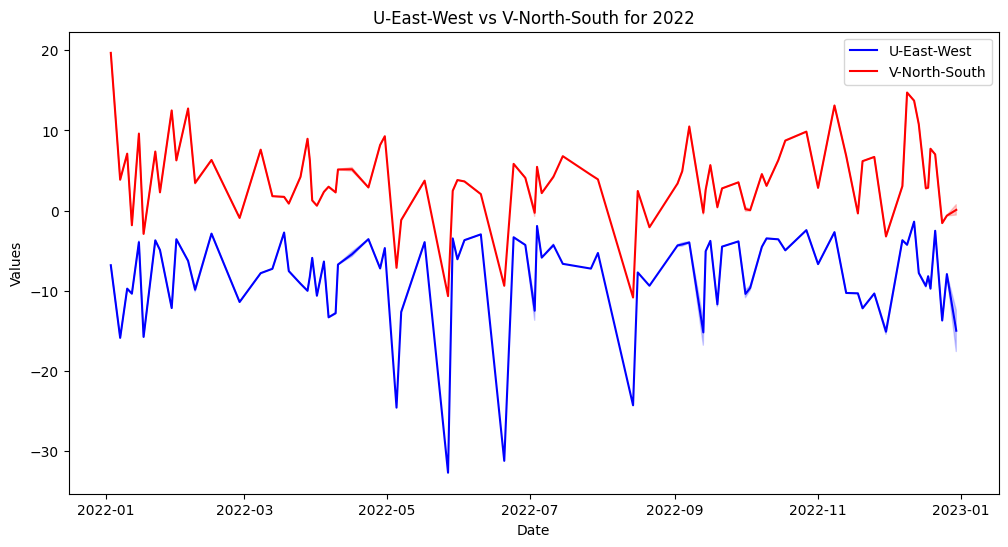

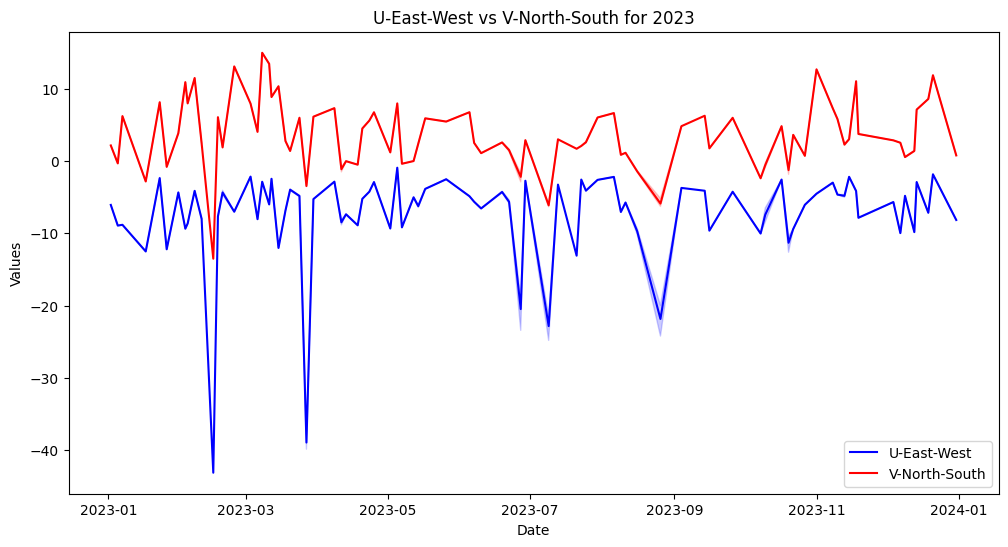

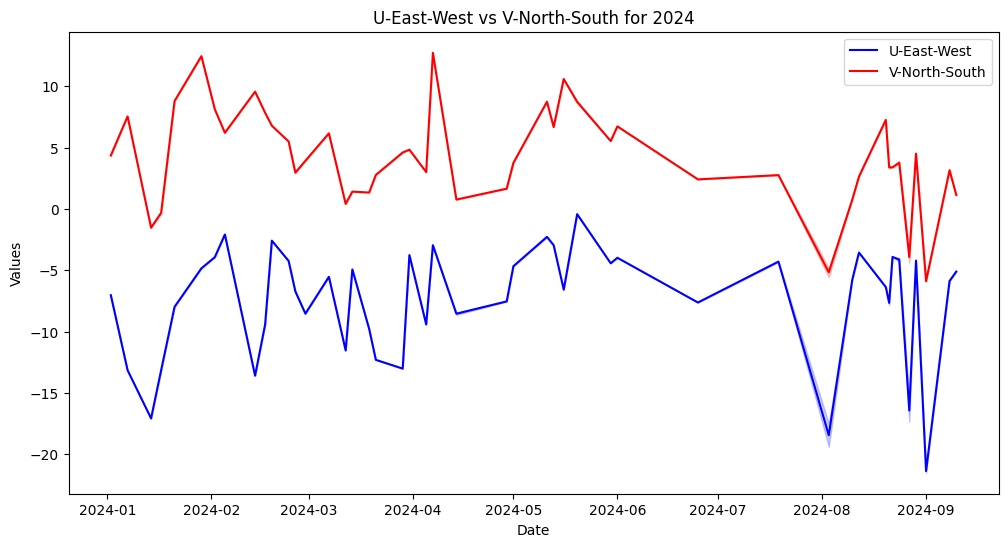

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique years from the 'Date' column
years = df_cluster_0['Date'].dt.year.unique()

# Loop over each year to generate individual plots
for year in years:
    # Filter the data for the current year
    df_year = df_cluster_0[df_cluster_0['Date'].dt.year == year]

    # Create a new seaborn plot for each year
    plt.figure(figsize=(12, 6))

    # Plot 'U-East-West' with seaborn
    sns.lineplot(x='Date', y='U-East-West', data=df_year, label='U-East-West', color='b')

    # Plot 'V-North-South' with seaborn
    sns.lineplot(x='Date', y='V-North-South', data=df_year, label='V-North-South', color='r')

    # Customize the plot with labels and title
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.title(f'Cluster 0: U-East-West vs V-North-South for {year}')
    plt.legend()

    # Display the plot
    plt.show()


In [107]:
df_cluster_0

Date      Speed   Direction  Cos(dir)  Sen(dir)        Lat  \
277333    2015-08-15  24.040342  249.998535 -0.342044 -0.939684  40.586525   
391927    2015-08-16  14.242403  287.600800  0.302383 -0.953186  41.043495   
332143    2015-08-16  15.707882  325.532990  0.824452 -0.565932  41.846226   
332142    2015-08-16  18.294191  312.595978  0.676824 -0.736145  41.844711   
332141    2015-08-16  18.328312  312.518707  0.675831 -0.737057  41.843185   
...              ...        ...         ...       ...       ...        ...   
214735039 2024-09-10   2.600000  291.033539  0.358914 -0.933370  38.230171   
214735043 2024-09-10   3.100000  288.061554  0.310039 -0.950724  38.236919   
214735044 2024-09-10   2.500000  290.068573  0.343145 -0.939283  38.238605   
214735802 2024-09-10   2.700000  287.061188  0.293393 -0.955992  38.263943   
214764037 2024-09-10   5.000000  281.076996  0.192128 -0.981370  39.279148   

                 Lon                                                 ID  \
277333    -73.617691  S1A_IW_OCN__2SDV_20150815T225027_20150815T2250...   
391927    -72.181259  S1A_IW_OCN__2SDV_20150816T104914_20150816T1049...   
332143    -71.078835  S1A_IW_OCN__2SDV_20150816T104849_20150816T1049...   
332142    -71.066971  S1A_IW_OCN__2SDV_20150816T104849_20150816T1049...   
332141    -71.055092  S1A_IW_OCN__2SDV_20150816T104849_20150816T1049...   
...              ...                                                ...   
214735039 -70.406113  S1A_IW_OCN__2SDV_20240910T223427_20240910T2234...   
214735043 -70.361229  S1A_IW_OCN__2SDV_20240910T223427_20240910T2234...   
214735044 -70.350006  S1A_IW_OCN__2SDV_20240910T223427_20240910T2234...   
214735802 -70.367859  S1A_IW_OCN__2SDV_20240910T223427_20240910T2234...   
214764037 -70.571442  S1A_IW_OCN__2SDV_20240910T223427_20240910T2234...   

          Start Time  End Time  U-East-West  V-North-South              x  \
277333      22:50:27  22:50:55   -22.590322      -8.222861 -189734.659306   
391927      10:49:14  10:49:39   -13.575665       4.306663  -68000.606048   
332143      10:48:49  10:49:14    -8.889587      12.950397   24198.748422   
332142      10:48:49  10:49:14   -13.467169      12.381954   25183.005691   
332141      10:48:49  10:49:14   -13.509009      12.386836   26168.575858   
...              ...       ...          ...            ...            ...   
214735039   22:34:27  22:34:52    -2.426763       0.933177   84211.082873   
214735043   22:34:27  22:34:52    -2.947244       0.961120   88121.223592   
214735044   22:34:27  22:34:52    -2.348207       0.857861   89098.808337   
214735802   22:34:27  22:34:52    -2.581178       0.792160   87509.603405   
214764037   22:34:27  22:34:52    -4.906849       0.960639   68760.430673   

                       y  Speed_rolling  Cluster  
277333     194140.785098      11.976234        0  
391927     242732.772208       4.666549        0  
332143     331450.395651      17.818190        0  
332142     331285.667630      16.982390        0  
332141     331119.803266      15.443979        0  
...                  ...            ...      ...  
214735039  -68622.067068       2.420000        0  
214735043  -67832.813709       2.440000        0  
214735044  -67635.304172       2.460000        0  
214735802  -64848.363292       2.700000        0  
214764037   47342.150139       5.100000        0  

[41702334 rows x 16 columns]

In [116]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [118]:
# df

/tmp/ipykernel_106047/2309284757.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cluster_counts_by_month, x='Month', y='Count', hue='Cluster',


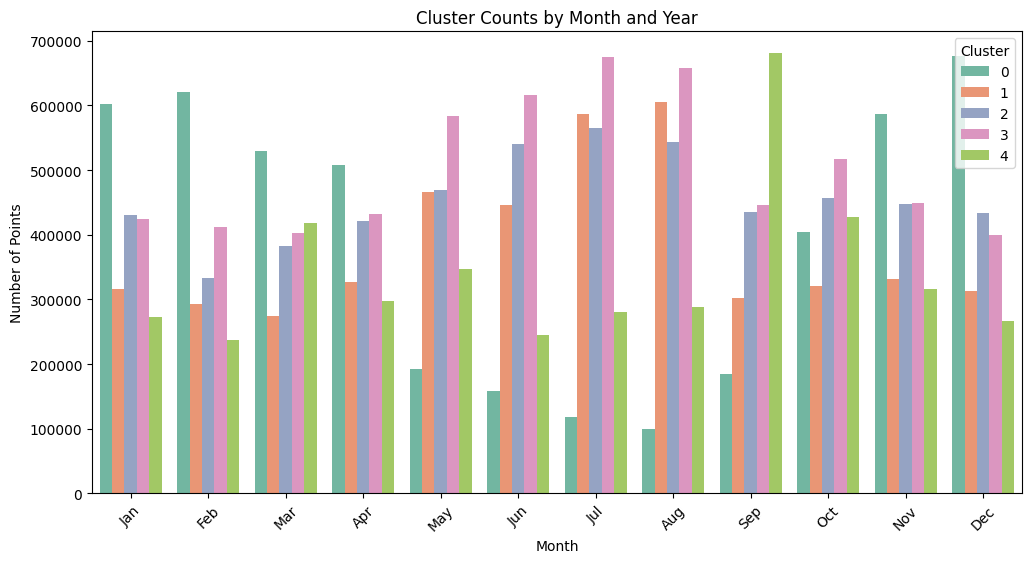

In [119]:
cluster_counts_by_month = df.groupby(['Year','Month', 'Cluster']).size().reset_index(name='Count')
# cluster_counts_by_month

# Create a bar plot to compare the number of points for each cluster by year and month
plt.figure(figsize=(12, 6))
sns.barplot(data=cluster_counts_by_month, x='Month', y='Count', hue='Cluster', 
            ci=None, palette="Set2", dodge=True)

# Customize the plot
plt.title('Cluster Counts by Month and Year')
plt.xlabel('Month')
plt.ylabel('Number of Points')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend(title='Cluster')

# Display the plot
plt.show()

In [167]:
df['Date'].dt.strftime('%Y-%m')

0            2019-04
1            2019-04
2            2019-04
3            2019-04
4            2019-04
              ...   
223109361    2021-01
223109362    2021-01
223109363    2021-01
223109364    2021-01
223109365    2021-01
Name: Date, Length: 223109366, dtype: object

In [168]:

pivot_data_filled = cluster_counts_by_month.pivot_table(index=['Year', 'Month'], columns='Cluster', values='Count', aggfunc='sum').fillna(0).reset_index()


In [164]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create the pivot table (assuming this step is already done)
pivot_data = cluster_counts_by_month.pivot_table(index=['Year', 'Month'], columns='Cluster', values='Count', aggfunc='sum').fillna(0).reset_index()

# Prepare the data for plotting
# First, create a "YearMonth" column for better handling of the months
pivot_data['YearMonth'] = pivot_data['Year'].astype(str) + '-' + pivot_data['Month'].astype(str)

# Pivot again to have 'Year' as rows and 'Month' as columns, with 'Cluster' values stacked
pivot_data_monthly = pivot_data.pivot_table(index='Year', columns='Month', values=range(0, len(pivot_data['Cluster'].unique())), aggfunc='sum').fillna(0)

# Prepare for plotting
# Plot the data with the stacked months across all years
plt.figure(figsize=(14, 8))

# Iterate through years and plot each month's cluster values
for i in range(len(pivot_data['Month'])):
    plt.stackplot(pivot_data_monthly)    ## Repeat all


KeyError: 'Cluster'

In [149]:
pivot_data_filled.values.T

array([[0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 2.100000e+01, 0.000000e+00, 0.000000e+00,
        1.702480e+05, 0.000000e+00, 2.240300e+05, 2.730900e+04,
        2.874200e+04, 5.707000e+05, 1.819080e+05, 2.354690e+05,
        1.491370e+05, 7.214970e+05, 4.174720e+05, 2.648370e+05,
        1.336414e+06, 6.031470e+05, 5.379590e+05, 5.948230e+05,
        4.129970e+05, 5.800270e+05, 5.355960e+05, 5.580610e+05,
        7.548130e+05, 4.686350e+05, 1.756791e+06, 1.138360e+05,
        3.306960e+05, 2.944410e+05, 2.626710e+05, 6.054810e+05,
        4.603790e+05, 2.888590e+05, 3.900160e+05, 1.154320e+05,
        2.692140e+05, 4.492310e+05, 5.091900e+05, 3.892420e+05,
        2.194230e+05, 4.062450e+05, 1.925750e+05, 4.689980e+05,
        2.325970e+05, 2.569340e+05],
       [3.776300e+04, 0.000000e+00, 3.800000e+01, 9.047300e+04,
        1.282680e+05, 1.095830e+05, 6.000000e+00, 6.241100e+04,
        4.741160e+05, 8.257000e+04, 2.578400e+04, 1.615560e+05,
   

In [162]:


# Check for any remaining NaN values after filling
if pivot_data_filled.isnull().any().any():
    print("Warning: There are still NaN values in the data")
else:
    print("No NaN values remaining in the data")

# Create the stacked area plot for each cluster and each year
plt.figure(figsize=(12, 6))

# Get the cluster names and years
cluster_names = pivot_data_filled.index.get_level_values('Cluster').unique()
years = pivot_data_filled.columns

# Plot the stacked area plot
plt.stackplot(pivot_data_filled.index, pivot_data_filled.values.T, labels=cluster_names, alpha=0.7, cmap='Set2')

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Stacked Area Plot of Clusters Over Time (Years and Months)')

# Set the x-ticks to show the month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), month_names)

# Add a legend for clusters
plt.legend(title='Cluster')

# Show the plot
plt.tight_layout()
plt.show()


No NaN values remaining in the data


KeyError: 'Requested level (Cluster) does not match index name (None)'

<Figure size 1200x600 with 0 Axes>

   Year  Month  Cluster   Count
0  2015      7        3   48829
1  2015      8        0    2577
2  2015      8        2   33996
3  2015      8        3  296088
4  2015      8        4   34262


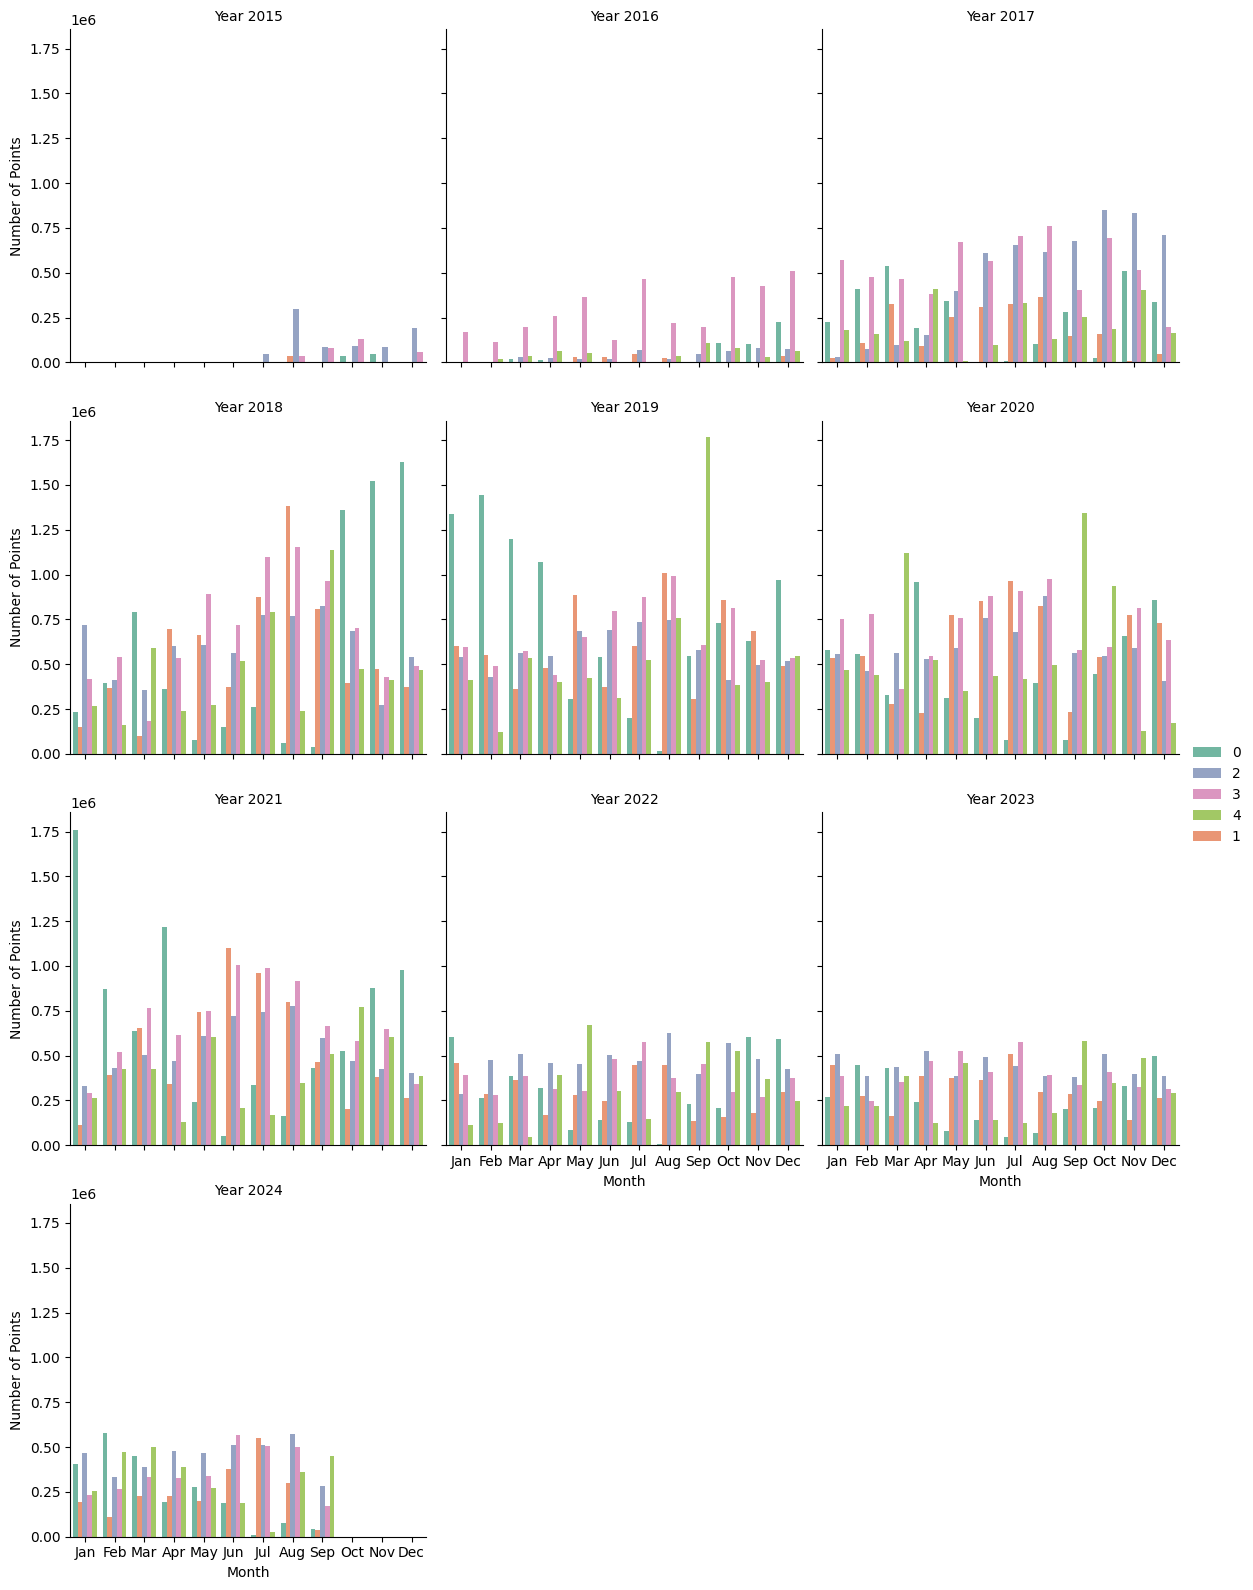

In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the DataFrame `cluster_counts_by_month`
# with columns: 'Year', 'Month', 'Cluster', 'Count'

# Ensure the columns are of the correct type
cluster_counts_by_month['Year'] = cluster_counts_by_month['Year'].astype(int)
cluster_counts_by_month['Month'] = cluster_counts_by_month['Month'].astype(int)
cluster_counts_by_month['Cluster'] = cluster_counts_by_month['Cluster'].astype(int)

# Check the structure of the dataframe to ensure no issues
print(cluster_counts_by_month.head())

# Set the order for the months (from Jan to Dec)
month_order = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

# Create the FacetGrid plot
g = sns.FacetGrid(cluster_counts_by_month, col="Year", col_wrap=3, height=4)

# Map the barplot to the grid
g.map_dataframe(sns.barplot, x='Month', y='Count', hue='Cluster', dodge=True, palette="Set2", order=month_order)

# Customize the plot
g.set_axis_labels("Month", "Number of Points")
g.set_titles("Year {col_name}")
g.set(xticks=range(12), xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Add legend
g.add_legend()

# Display the plot
plt.show()


In [136]:
# Filter the data for the year 2020
data_2020 = cluster_counts_by_month[cluster_counts_by_month['Year'] == 2018]
# Pivot the data: 'Month' as index, 'Cluster' as columns, 'Count' as values
pivot_data = data_2020.pivot_table(index='Month', columns='Cluster', values='Count', aggfunc='sum')

# Fill missing values with 0 (if any clusters are missing for a particular month)
pivot_data = pivot_data.fillna(0)


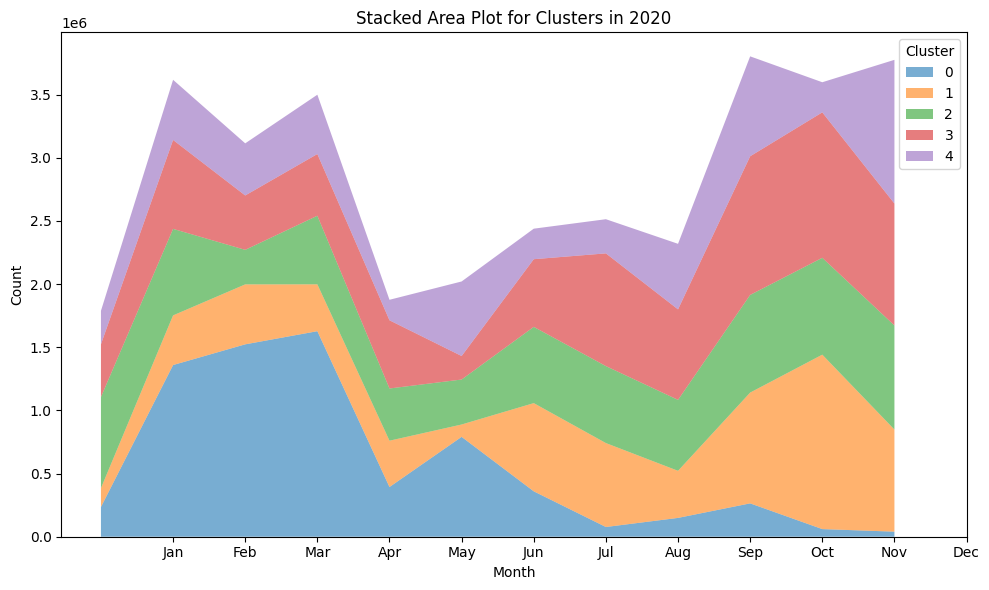

In [137]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))

# Plot a stacked area chart
plt.stackplot(pivot_data.index, pivot_data.values.T, labels=pivot_data.columns, alpha=0.6, cmap='Set2')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Stacked Area Plot for Clusters in 2020')

# Set x-ticks to show month names (assuming 'Month' is an integer 1-12)
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), month_names)

# Add a legend for clusters
plt.legend(title='Cluster')

# Show the plot
plt.tight_layout()
plt.show()


In [138]:
# Pivot the data for all years: 'Year' as columns, 'Month' as index, and 'Cluster' as values
pivot_data_all_years = cluster_counts_by_month.pivot_table(index='Month', columns=['Year', 'Cluster'], values='Count', aggfunc='sum')

# Fill missing values with 0 (in case any cluster-month combination is missing)
pivot_data_all_years = pivot_data_all_years.fillna(0)


TypeError: plot_area() missing 1 required positional argument: 'ax'

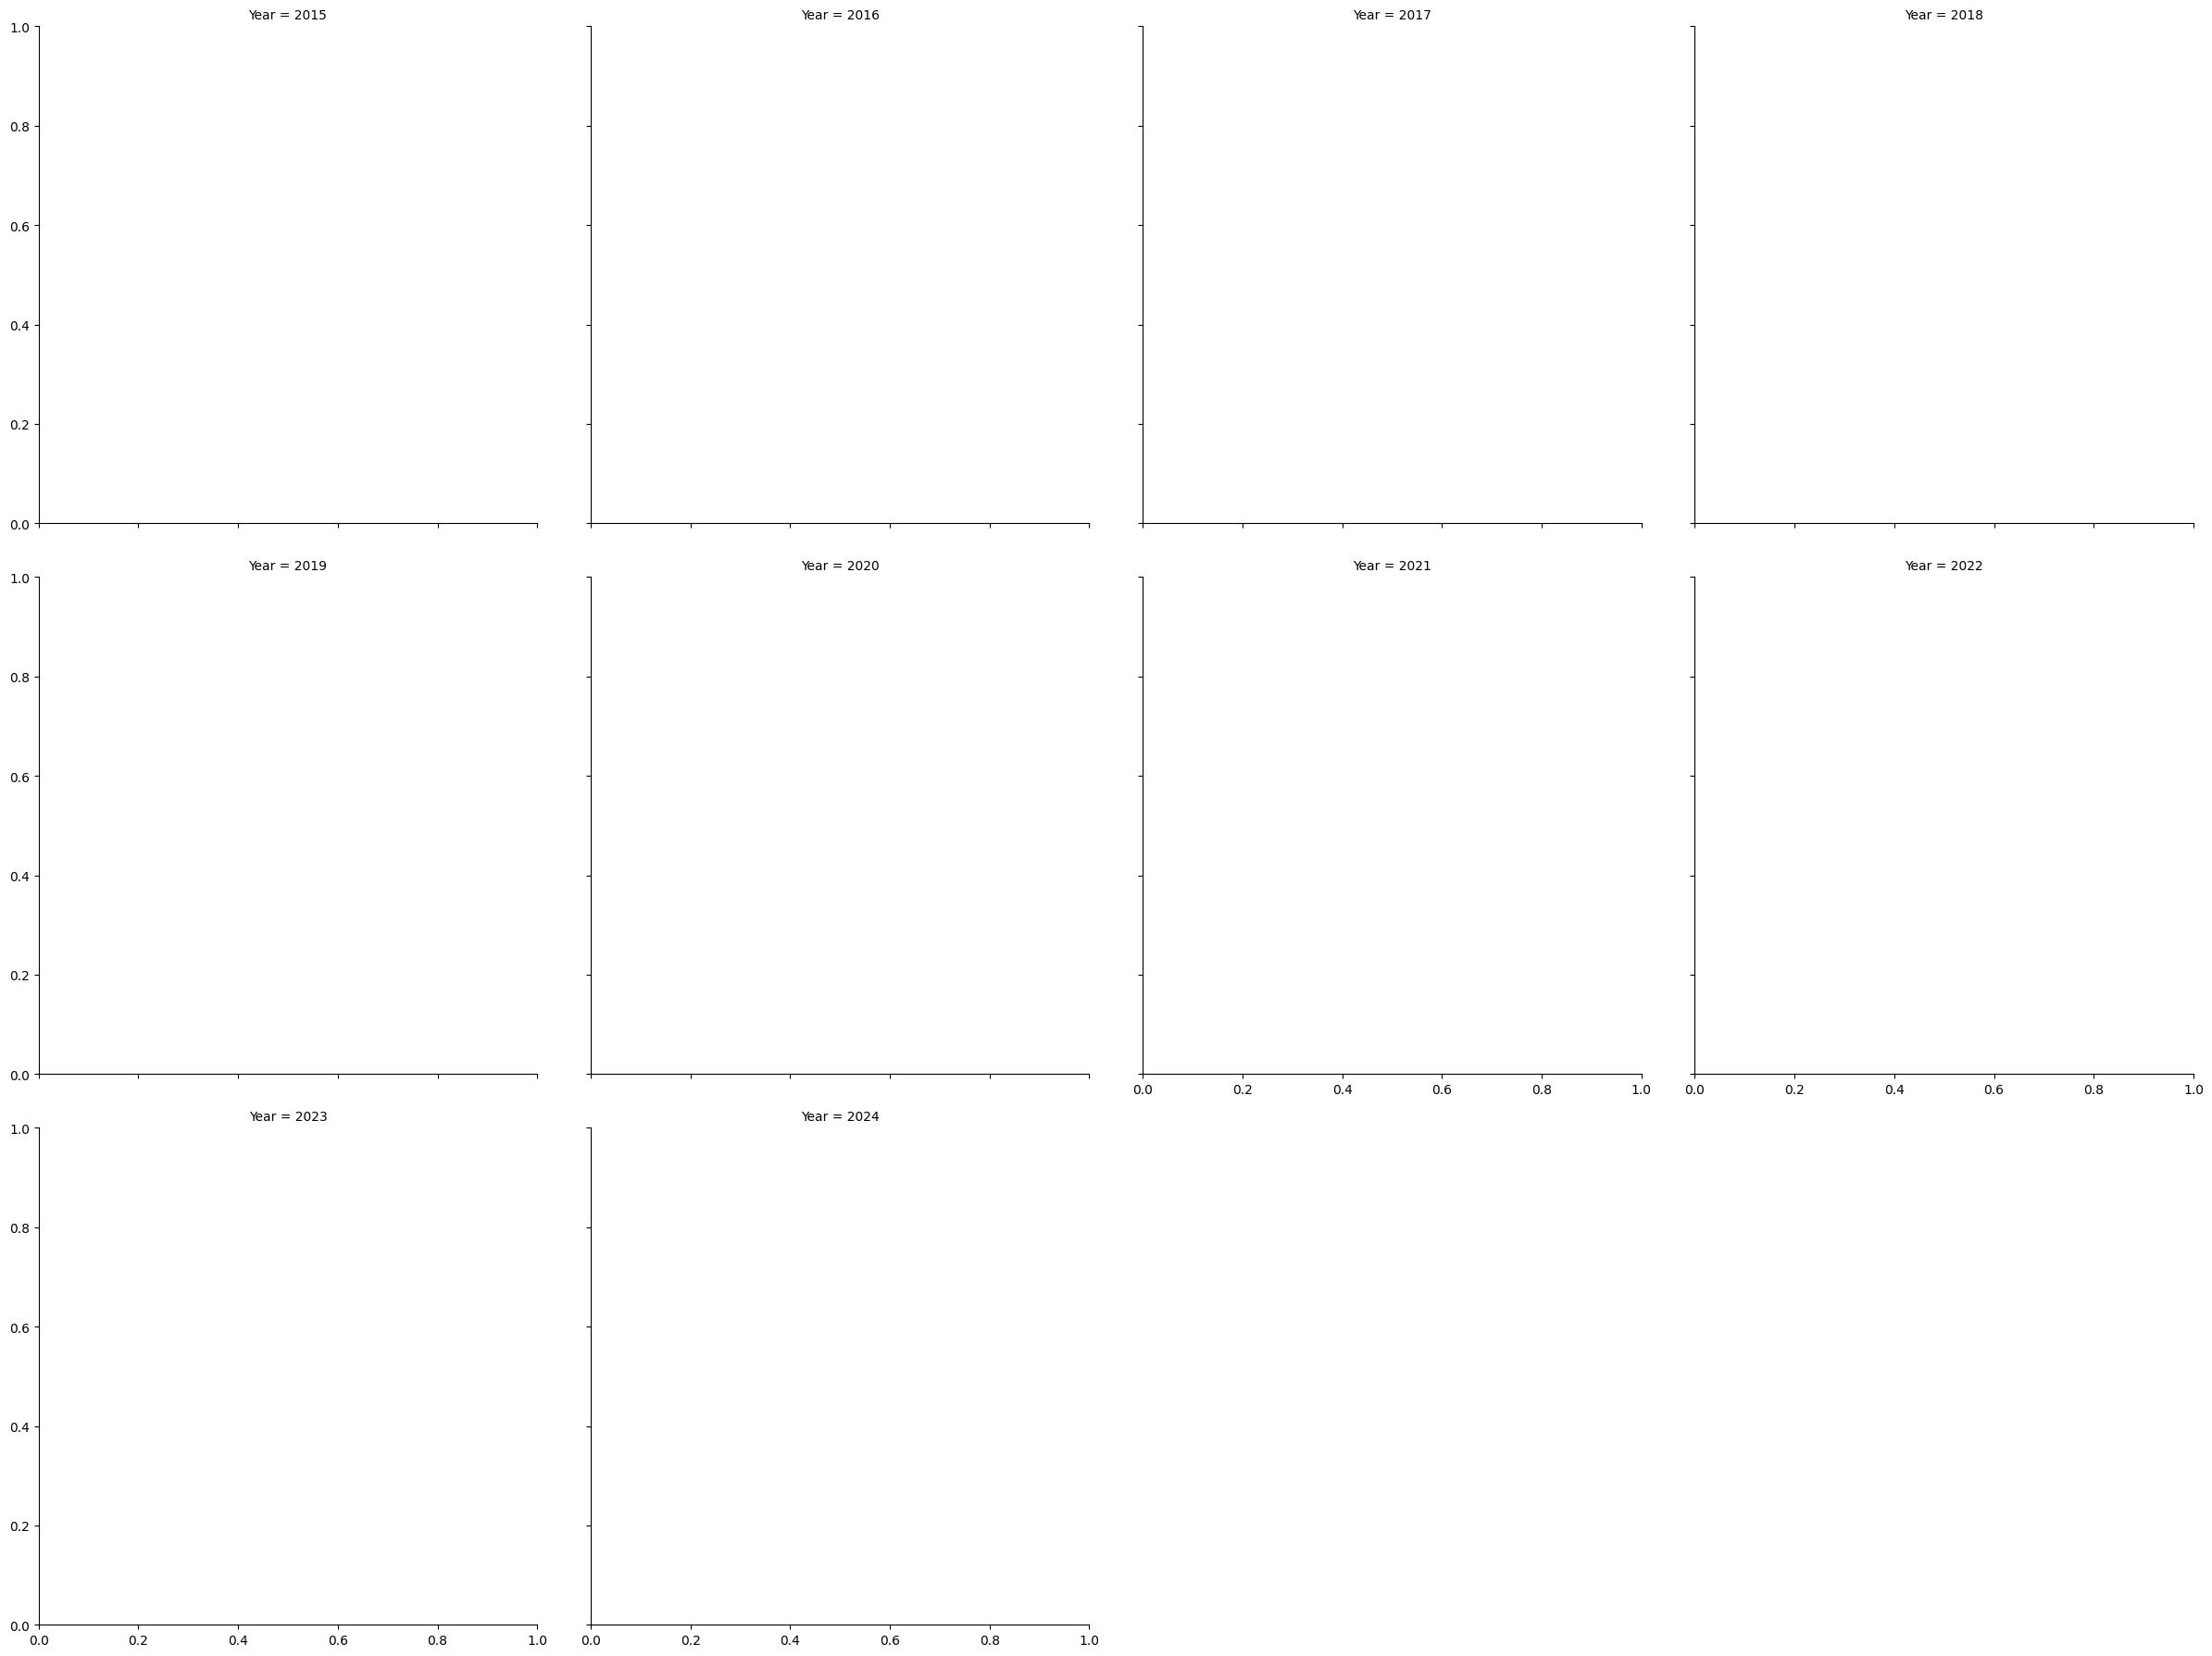

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and the FacetGrid
g = sns.FacetGrid(cluster_counts_by_month, col="Year", col_wrap=4, height=6)

# Function to plot the stacked area plot for each facet
def plot_area(ax, data, **kwargs):
    # Pivot the data for the current year
    pivot_data = data.pivot_table(index='Month', columns='Cluster', values='Count', aggfunc='sum').fillna(0)
    
    # Plot the stacked area chart
    ax.stackplot(pivot_data.index, pivot_data.values.T, labels=pivot_data.columns, alpha=0.6, cmap='Set2')
    
    # Set labels and title
    ax.set_xlabel('Month')
    ax.set_ylabel('Count')
    ax.set_title(f'Stacked Area Plot for {data["Year"].iloc[0]}')

    # Set x-ticks to show month names
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(month_names)

    # Add a legend for clusters
    ax.legend(title='Cluster')

# Map the plot_area function to the FacetGrid
g.map_dataframe(plot_area)

# Adjust the layout for better spacing
g.tight_layout()

# Show the plot
plt.show()


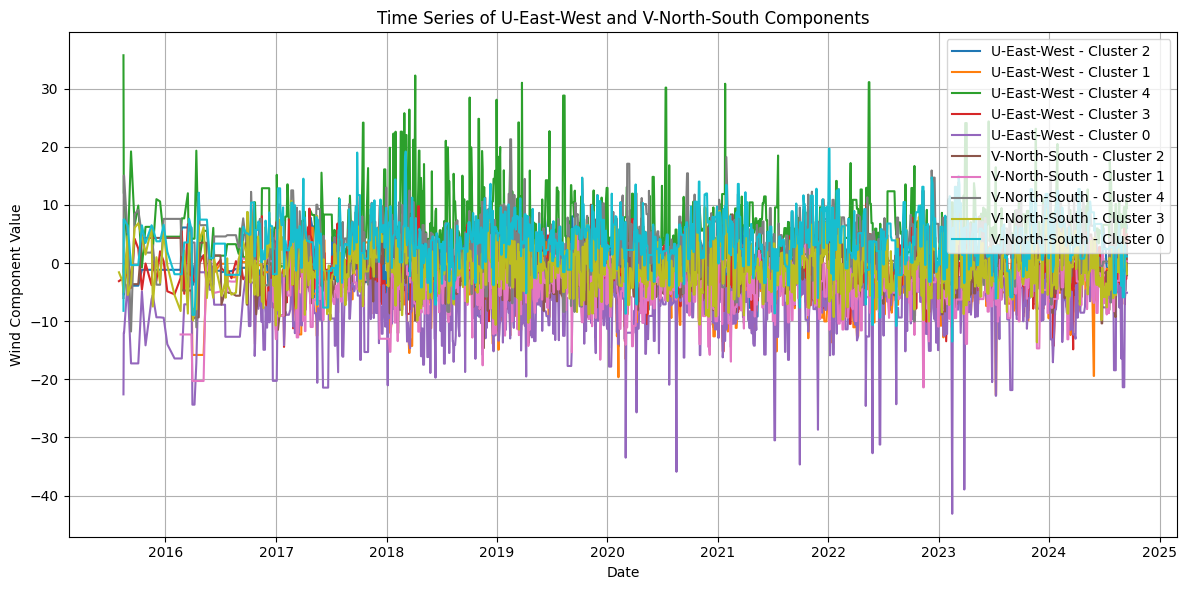

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_time_series(df):
    """
    Plots the time series of U-East-West and V-North-South components' mean values.
    
    Parameters:
    df (pandas.DataFrame): Input DataFrame with columns 'U-East-West', 'V-North-South',
                            'Date', and 'Cluster'.
    """
    # Pivot table with Date as index and Cluster as columns
    df_pivot = df.pivot_table(
        ['U-East-West', 'V-North-South'], 
        index='Date', 
        columns='Cluster', 
        aggfunc='mean'
    )

    # Handle NaN values (forward fill for simplicity)
    df_pivot_filled = df_pivot.ffill()  # forward fill missing values

    # Plotting the time series
    plt.figure(figsize=(12, 6))
    
    # Plot mean values for U-East-West and V-North-South components across all clusters
    for var in ['U-East-West', 'V-North-South']:
        for cluster in df['Cluster'].unique():
            # Accessing the mean value for the current component and cluster
            plt.plot(df_pivot_filled.index, df_pivot_filled[(var, cluster)], label=f'{var} - Cluster {cluster}')
    
    # Formatting plot
    plt.title('Time Series of U-East-West and V-North-South Components')
    plt.xlabel('Date')
    plt.ylabel('Wind Component Value')
    plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
plot_time_series(df)


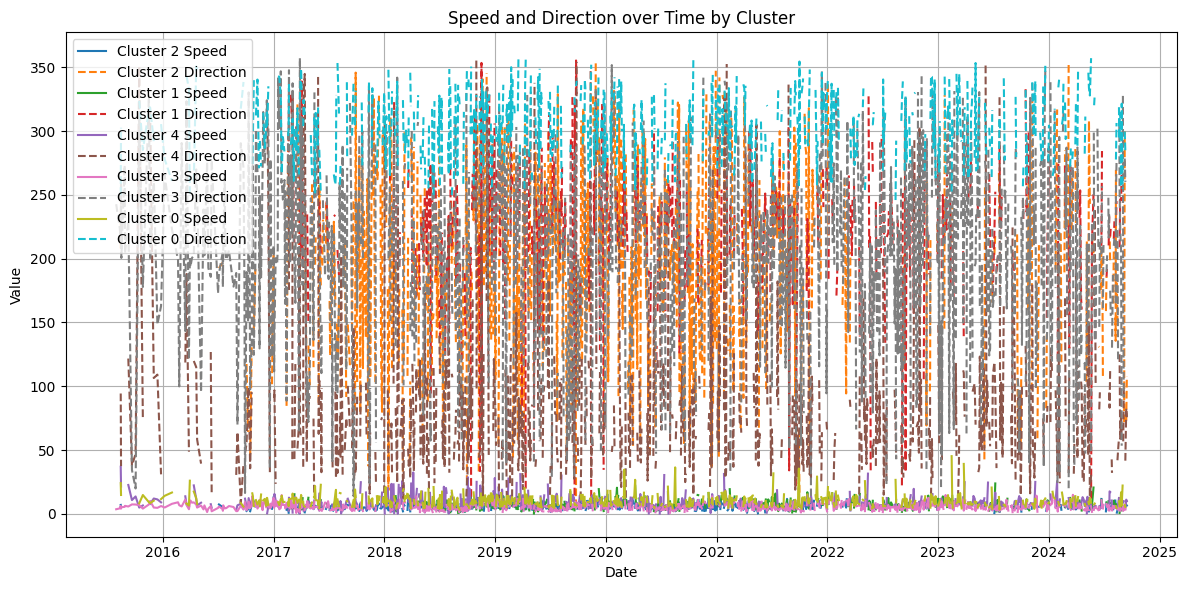

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with 'Date', 'Speed', 'Direction', 'Cluster', 'Lat', 'Lon'
def analyze_clusters_over_time(df):
    # Convert 'Date' to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Create a pivot table with Date as index, Cluster as columns, and aggregation function (mean) for speed and direction
    df_pivot = df.pivot_table(
        index='Date', 
        columns='Cluster', 
        values=['Speed', 'Direction'], 
        aggfunc='mean'
    )
    
    # Plot Speed and Direction for each cluster
    plt.figure(figsize=(12, 6))
    for cluster in df['Cluster'].unique():
        plt.plot(df_pivot.index, df_pivot['Speed'][cluster], label=f'Cluster {cluster} Speed', linestyle='-')
        plt.plot(df_pivot.index, df_pivot['Direction'][cluster], label=f'Cluster {cluster} Direction', linestyle='--')
    
    plt.title('Speed and Direction over Time by Cluster')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage
analyze_clusters_over_time(df)


<Figure size 1200x600 with 0 Axes>

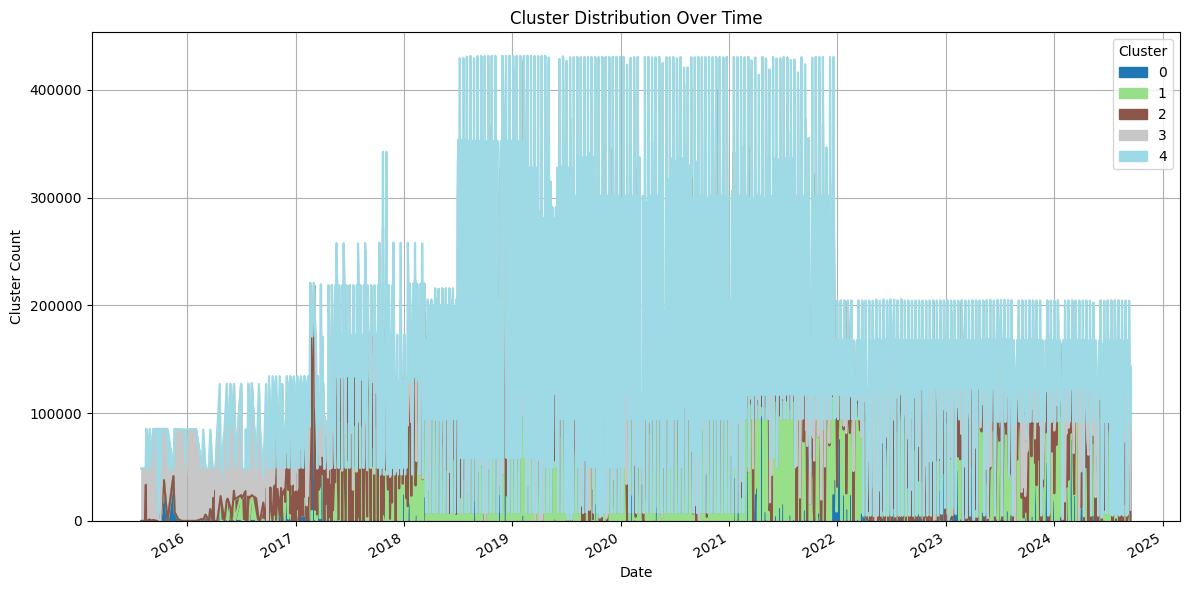

In [86]:
def plot_cluster_distribution_over_time(df):
    # Assuming 'Cluster' is already part of the DataFrame
    plt.figure(figsize=(12, 6))

    # Plotting a count of each cluster over time
    cluster_counts = df.groupby(['Date', 'Cluster']).size().unstack(fill_value=0)

    cluster_counts.plot(kind='area', stacked=True, colormap='tab20', figsize=(12, 6))
    
    plt.title('Cluster Distribution Over Time')
    plt.xlabel('Date')
    plt.ylabel('Cluster Count')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage
plot_cluster_distribution_over_time(df)


<Figure size 1200x600 with 0 Axes>

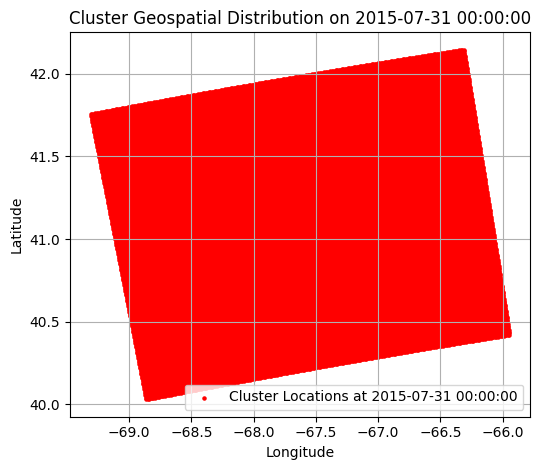

In [87]:
import geopandas as gpd
from shapely.geometry import Point

def plot_cluster_geospatial_distribution(df):
    # Assuming the 'lat' and 'lon' columns exist and 'Cluster' column is present
    # Create a GeoDataFrame from the lat/lon and cluster
    gdf = gpd.GeoDataFrame(
        df, 
        geometry=gpd.points_from_xy(df['Lon'], df['Lat']),
        crs="EPSG:4326"
    )

    # Plot the clusters at a specific time (e.g., the first day)
    time_point = df['Date'].min()  # Adjust this to a specific date if needed
    gdf_timepoint = gdf[gdf['Date'] == time_point]
    
    plt.figure(figsize=(12, 6))
    gdf_timepoint.plot(marker='o', color='red', markersize=5, label=f'Cluster Locations at {time_point}')
    plt.title(f'Cluster Geospatial Distribution on {time_point}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage
plot_cluster_geospatial_distribution(df)


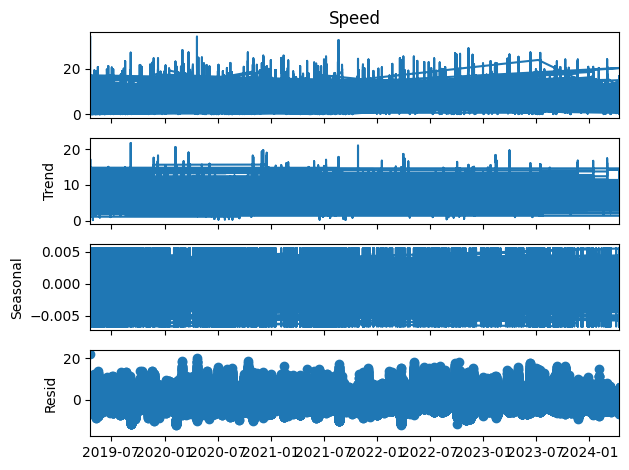

In [88]:
from statsmodels.tsa.seasonal import seasonal_decompose

def analyze_trends_seasonality(df, cluster_id):
    # Assuming df_pivot is already created
    cluster_data = df[df['Cluster'] == cluster_id].set_index('Date')

    # Decompose speed or direction time series for this cluster
    speed_series = cluster_data['Speed']
    decomposition = seasonal_decompose(speed_series, model='additive', period=365)  # Period could vary depending on your data
    decomposition.plot()
    plt.show()

# Example usage for analyzing a specific cluster (e.g., cluster 1)
analyze_trends_seasonality(df, 1)
